In [153]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

options(repr.plot.width = 13.0, repr.plot.height = 13.0)

[1] "dataset-for-renewable-energy-systems"

# **Import**

In [154]:
library(dplyr)
library(ggplot2)
library(gridExtra)
library(psych)
library(ggcorrplot)

# **1. Data Import & Structure**

In [155]:
data <- read_csv('/kaggle/input/dataset-for-renewable-energy-systems/energy_dataset_.csv',show_col_types = FALSE)

**Variables**
* **Type_of_Renewable_Energy: Numerical code representing the type of renewable energy source (1: Solar, 2: Wind, 3: Hydroelectric, 4: Geothermal, 5: Biomass, 6: Tidal, 7: Wave).**
* **Installed_Capacity_MW: Installed capacity in megawatts (MW).**
* **Energy_Production_MWh: Yearly energy production in megawatt-hours (MWh).**
* **Energy_Consumption_MWh: Yearly energy consumption in megawatt-hours (MWh).**
* **Energy_Storage_Capacity_MWh: Energy storage capacity in megawatt-hours (MWh).**
* **Storage_Efficiency_Percentage: Efficiency of energy storage systems in percentage.**
* **Grid_Integration_Level: Numerical code representing the level of grid integration (1: Fully Integrated, 2: Partially Integrated, 3: Minimal Integration, 4: Isolated Microgrid).**
* **Initial_Investment_USD: Initial investment costs in USD.**
* **Funding_Sources: Numerical code representing the funding source (1: Government, 2: Private, 3: Public-Private Partnership).**
* **Financial_Incentives_USD: Financial incentives in USD.**
* **GHG_Emission_Reduction_tCO2e: Reduction in greenhouse gas emissions in tons of CO2 equivalent (tCO2e).**
* **Air_Pollution_Reduction_Index: Air pollution reduction index.**
* **Jobs_Created: Number of jobs created.**

In [156]:
str(data)

spc_tbl_ [15,000 × 13] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Type_of_Renewable_Energy     : num [1:15000] 4 4 1 1 3 1 5 1 1 2 ...
 $ Installed_Capacity_MW        : num [1:15000] 93.4 590.5 626 780 242.1 ...
 $ Energy_Production_MWh        : num [1:15000] 103853 190223 266023 487040 482815 ...
 $ Energy_Consumption_MWh       : num [1:15000] 248708 166104 424115 308338 360438 ...
 $ Energy_Storage_Capacity_MWh  : num [1:15000] 2953 5305 2620 1925 3949 ...
 $ Storage_Efficiency_Percentage: num [1:15000] 89.9 84.4 60.5 86.9 70.9 ...
 $ Grid_Integration_Level       : num [1:15000] 4 4 2 3 2 3 1 2 2 3 ...
 $ Initial_Investment_USD       : num [1:15000] 4.73e+08 1.67e+08 8.46e+07 3.97e+08 3.57e+07 ...
 $ Funding_Sources              : num [1:15000] 1 2 2 2 1 2 1 1 1 2 ...
 $ Financial_Incentives_USD     : num [1:15000] 9207772 1685101 5111813 4805902 16686014 ...
 $ GHG_Emission_Reduction_tCO2e : num [1:15000] 6664 30656 1750 43233 14859 ...
 $ Air_Pollution_Reduction_Index: num [1:15000

In [157]:
describe(data)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Type_of_Renewable_Energy,1,15000,3.973933e+00,1.999380e+00,4.000000e+00,3.967417e+00,2.965200e+00,1.000000e+00,7.000000e+00,6.000000e+00,0.016732594,-1.253211,1.632487e-02
Installed_Capacity_MW,2,15000,4.958557e+02,2.882129e+02,4.929076e+02,4.945314e+02,3.678890e+02,1.091767e+00,9.999830e+02,9.988912e+02,0.031077109,-1.187699,2.353248e+00
Energy_Production_MWh,3,15000,2.523510e+05,1.440629e+05,2.532169e+05,2.527248e+05,1.839604e+05,1.030104e+03,4.999912e+05,4.989611e+05,-0.015787148,-1.195869,1.176269e+03
Energy_Consumption_MWh,4,15000,2.259819e+05,1.292237e+05,2.252264e+05,2.260470e+05,1.653568e+05,5.840480e+02,4.499227e+05,4.493386e+05,0.003037877,-1.192506,1.055107e+03
Energy_Storage_Capacity_MWh,5,15000,5.030196e+03,2.894096e+03,5.054036e+03,5.034431e+03,3.700606e+03,2.200208e+00,9.999145e+03,9.996945e+03,-0.012774959,-1.199487,2.363020e+01
Storage_Efficiency_Percentage,6,15000,7.521933e+01,1.448529e+01,7.527970e+01,7.525529e+01,1.857768e+01,5.000349e+01,9.999495e+01,4.999146e+01,-0.020979311,-1.201398,1.182719e-01
Grid_Integration_Level,7,15000,2.501267e+00,1.123306e+00,3.000000e+00,2.501583e+00,1.482600e+00,1.000000e+00,4.000000e+00,3.000000e+00,-0.005416882,-1.372130,9.171753e-03
Initial_Investment_USD,8,15000,2.514849e+08,1.432843e+08,2.539910e+08,2.516336e+08,1.853907e+08,1.008107e+06,4.999407e+08,4.989326e+08,-0.008900816,-1.196329,1.169911e+06
Funding_Sources,9,15000,2.004000e+00,8.174933e-01,2.000000e+00,2.005000e+00,1.482600e+00,1.000000e+00,3.000000e+00,2.000000e+00,-0.007356534,-1.503719,6.674804e-03


In [158]:
summary(data)

 Type_of_Renewable_Energy Installed_Capacity_MW Energy_Production_MWh
 Min.   :1.000            Min.   :   1.092      Min.   :  1030       
 1st Qu.:2.000            1st Qu.: 245.476      1st Qu.:128569       
 Median :4.000            Median : 492.908      Median :253217       
 Mean   :3.974            Mean   : 495.856      Mean   :252351       
 3rd Qu.:6.000            3rd Qu.: 742.255      3rd Qu.:377084       
 Max.   :7.000            Max.   : 999.983      Max.   :499991       
 Energy_Consumption_MWh Energy_Storage_Capacity_MWh
 Min.   :   584         Min.   :   2.2             
 1st Qu.:115587         1st Qu.:2543.3             
 Median :225226         Median :5054.0             
 Mean   :225982         Mean   :5030.2             
 3rd Qu.:338656         3rd Qu.:7536.9             
 Max.   :449923         Max.   :9999.1             
 Storage_Efficiency_Percentage Grid_Integration_Level Initial_Investment_USD
 Min.   :50.00                 Min.   :1.000          Min.   :  10081

**Check missing value**

In [159]:
colSums(is.na(data))

Type_of_Renewable_Energy         Installed_Capacity_MW 
                            0                             0 
        Energy_Production_MWh        Energy_Consumption_MWh 
                            0                             0 
  Energy_Storage_Capacity_MWh Storage_Efficiency_Percentage 
                            0                             0 
       Grid_Integration_Level        Initial_Investment_USD 
                            0                             0 
              Funding_Sources      Financial_Incentives_USD 
                            0                             0 
 GHG_Emission_Reduction_tCO2e Air_Pollution_Reduction_Index 
                            0                             0 
                 Jobs_Created 
                            0

**duplicate check**

In [160]:
sum(duplicated(data))

[1] 0

In [161]:
head(data)

Type_of_Renewable_Energy,Installed_Capacity_MW,Energy_Production_MWh,Energy_Consumption_MWh,Energy_Storage_Capacity_MWh,Storage_Efficiency_Percentage,Grid_Integration_Level,Initial_Investment_USD,Funding_Sources,Financial_Incentives_USD,GHG_Emission_Reduction_tCO2e,Air_Pollution_Reduction_Index,Jobs_Created
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4,93.42321,103853.2,248708.5,2953.249,89.88756,4,473224764,1,9207772,6663.817,81.742461,1366
4,590.46894,190223.1,166104.2,5305.174,84.40334,4,167069722,2,1685101,30656.050,78.139042,1743
1,625.95114,266023.5,424114.6,2620.193,60.49825,2,84636100,2,5111813,1749.614,8.461296,363
1,779.99873,487039.5,308337.7,1925.250,86.89786,3,396768982,2,4805902,43233.238,8.402441,2821
3,242.10684,482815.1,360437.8,3948.945,70.94935,2,35744128,1,16686014,14858.663,28.822867,2583
1,596.17463,292384.5,415449.6,9767.234,50.90191,3,449150518,2,11315379,16089.626,9.038487,309


In [162]:
tail(data)

Type_of_Renewable_Energy,Installed_Capacity_MW,Energy_Production_MWh,Energy_Consumption_MWh,Energy_Storage_Capacity_MWh,Storage_Efficiency_Percentage,Grid_Integration_Level,Initial_Investment_USD,Funding_Sources,Financial_Incentives_USD,GHG_Emission_Reduction_tCO2e,Air_Pollution_Reduction_Index,Jobs_Created
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,359.98712,210340.2,272822.8,499.5173,66.55848,2,380579590,1,6623189,20237.32,82.104322,3794
3,745.03256,280007.6,230544.8,4351.6879,90.79140,4,348413618,2,15585079,25234.91,78.923200,1452
1,15.18702,377340.6,358547.4,6792.1947,78.25204,4,256017850,3,6866618,15762.52,54.982974,2598
3,877.53906,480497.4,214441.7,4588.7253,58.28293,1,130011205,2,3837764,44597.81,43.915897,2713
7,551.26472,436383.2,137043.9,7251.1442,73.57367,2,333483073,2,5347706,34363.86,4.877145,2128
3,863.42180,314014.3,124461.9,7366.1664,86.86889,4,298982500,2,18325342,27193.22,50.559075,1871


# **2. Data Transform**

In [163]:
data$Type_of_Renewable_Energy <- ifelse(data$Type_of_Renewable_Energy == 1 , 'Solar',
                                       ifelse(data$Type_of_Renewable_Energy == 2 , 'Wind',
                                             ifelse(data$Type_of_Renewable_Energy == 3 , 'Hydroelectric',
                                                   ifelse(data$Type_of_Renewable_Energy == 4 , 'Geothermal',
                                                         ifelse(data$Type_of_Renewable_Energy == 5 , 'Biomass',
                                                               ifelse(data$Type_of_Renewable_Energy == 6 , 'Tidal',
                                                                     ifelse(data$Type_of_Renewable_Energy == 7 , 'Wave', 'NA')))))))

In [164]:
data$Grid_Integration_Level <- ifelse(data$Grid_Integration_Level == 1 , 'Full Integration',
                                       ifelse(data$Grid_Integration_Level == 2 , 'Partial Integration',
                                             ifelse(data$Grid_Integration_Level == 3 , 'Minimal Integration','Isolated Microgrid')))

In [165]:
data$Funding_Sources <- ifelse(data$Funding_Sources == 1 , 'Government',
                                       ifelse(data$Funding_Sources == 2 , 'Private',
                                             ifelse(data$Funding_Sources == 3 , 'Public-Private','NA')))

# **3. Data Visualization**

**Categorical Variables Distribution**

In [166]:
p1 <- ggplot(data) + geom_bar(aes(x= Type_of_Renewable_Energy , fill = Type_of_Renewable_Energy)) + 
    theme_bw() +
    ggtitle('Type_of_Renewable_Energy Count') + 
    theme(axis.title = element_text(size=15),
    axis.text.x = element_text(size = 15, hjust=1),
    title = element_text(size=15)
    )
p2 <- ggplot(data) + geom_bar(aes(x= Grid_Integration_Level , fill = Grid_Integration_Level)) + 
    theme_bw() +
    ggtitle('Grid_Integration Count') + 
    theme(axis.title = element_text(size=15),
    axis.text.x = element_text(size = 15, hjust=1),
    title = element_text(size=15)
    )

p3 <- ggplot(data) +  geom_bar(aes(x= Funding_Sources , fill = Funding_Sources)) +
    theme_bw() +
    ggtitle('Funding_Sources Count') + 
    theme(axis.title = element_text(size=15),
    axis.text.x = element_text(size = 15, hjust=1),
    title = element_text(size=15)
    )

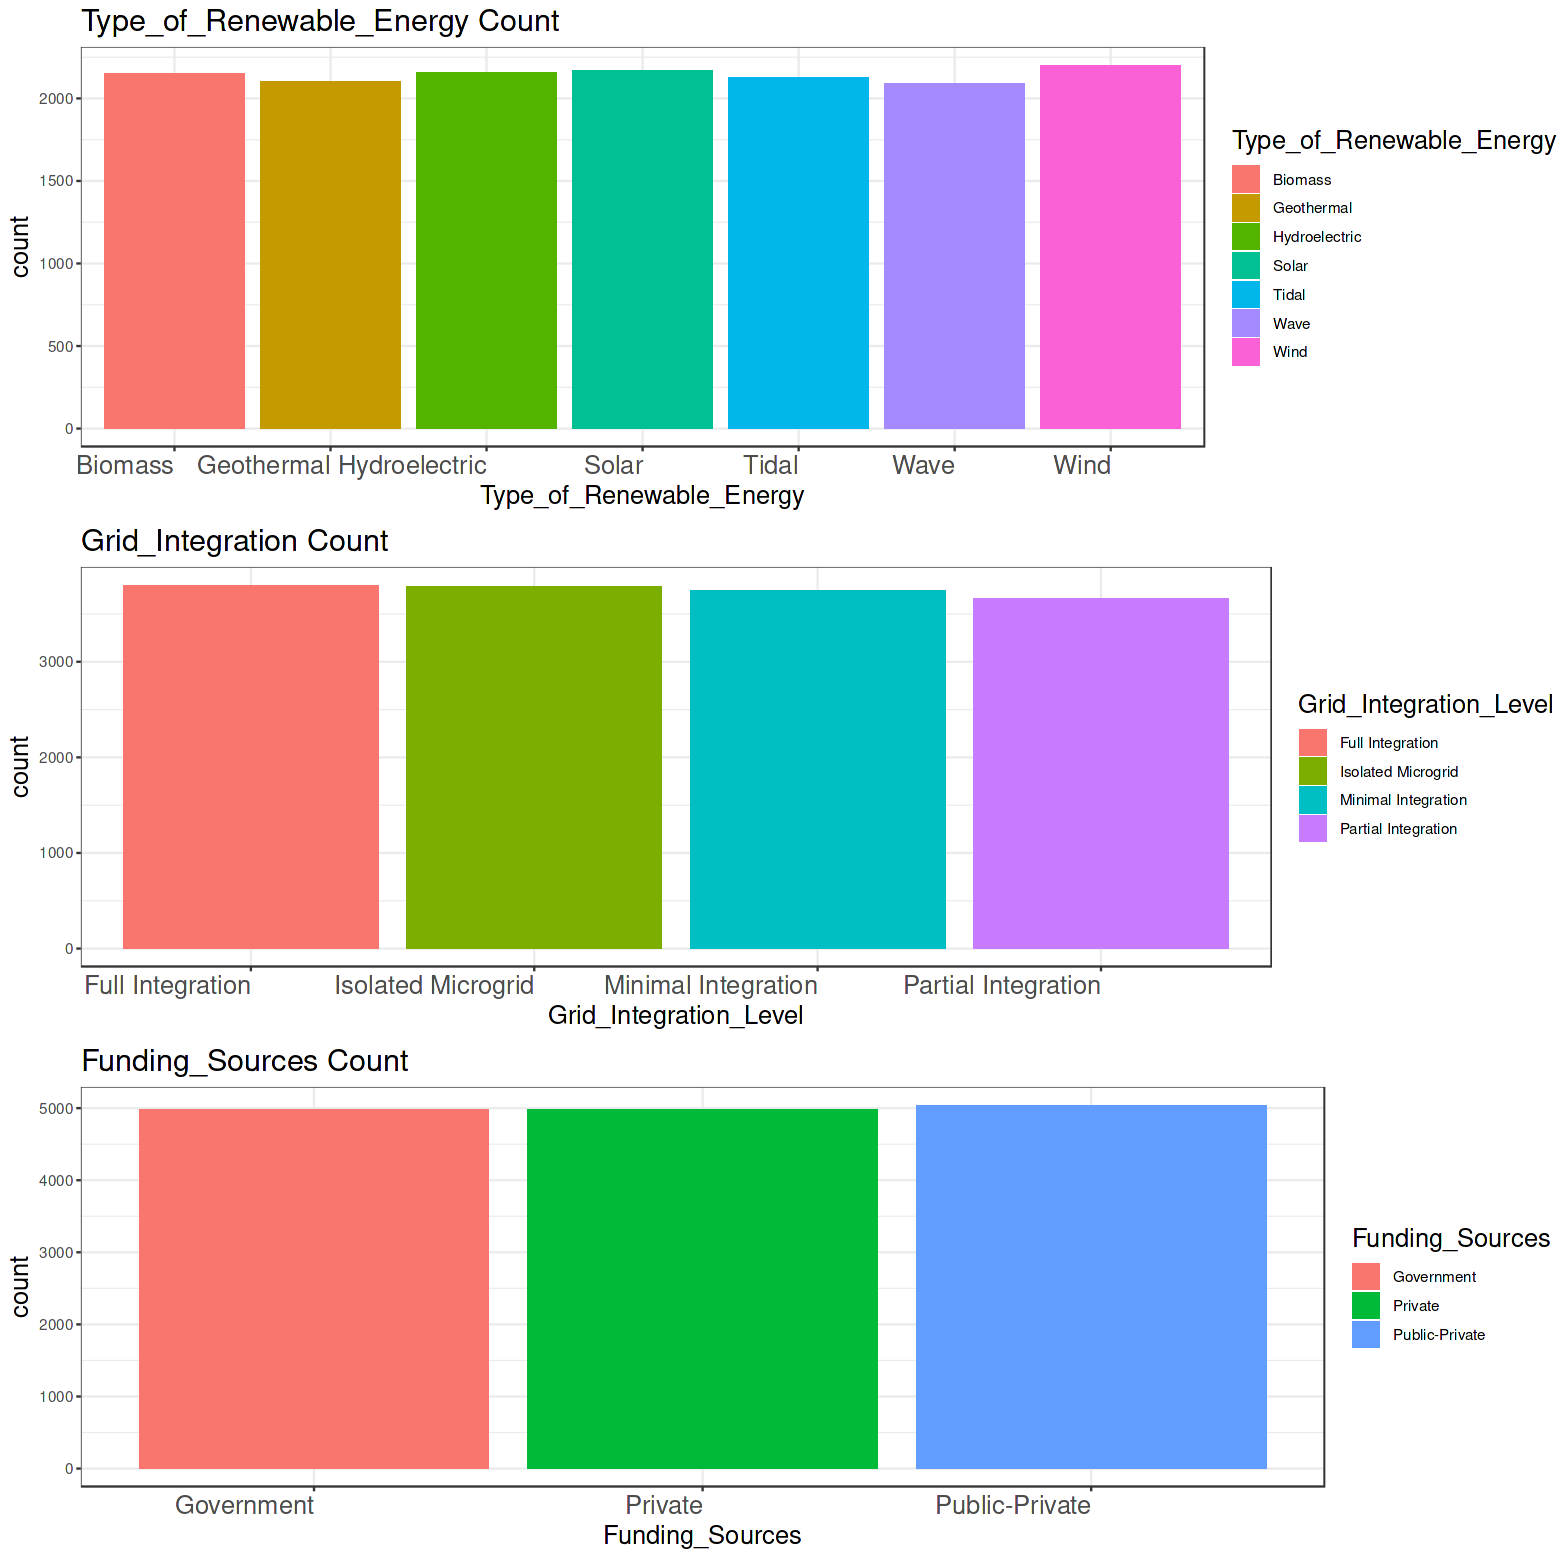

In [167]:
grid.arrange(p1,p2,p3 , ncol = 1)

**BoxPlot by Variables**

In [168]:
p1 <- ggplot(data, aes(x = Installed_Capacity_MW)) + 
        geom_boxplot(fill = 'red') + 
        ggtitle('Installed_Capacity') + 
        theme_bw() +
        theme(axis.title = element_text(size=15),
        axis.text.x = element_text(size = 15, hjust=1),
        title = element_text(size=15)
        )

p2 <- ggplot(data, aes(x = Energy_Production_MWh)) + 
        geom_boxplot(fill = 'orange') + 
        ggtitle('Energy_Production') + 
        theme_bw() +
        theme(axis.title = element_text(size=15),
        axis.text.x = element_text(size = 15, hjust=1),
        title = element_text(size=15)
        )
p3 <- ggplot(data, aes(x = Energy_Consumption_MWh)) + 
        geom_boxplot(fill = 'yellow green') + 
        ggtitle('Energy_Consumption') + 
        theme_bw() +
        theme(axis.title = element_text(size=15),
        axis.text.x = element_text(size = 15, hjust=1),
        title = element_text(size=15)
        )
p4 <- ggplot(data, aes(x = Energy_Storage_Capacity_MWh)) + 
        geom_boxplot(fill = 'blue') + 
        ggtitle('Energy_Storage_Capacity') + 
        theme_bw() +
        theme(axis.title = element_text(size=15),
        axis.text.x = element_text(size = 15, hjust=1),
        title = element_text(size=15)
        )

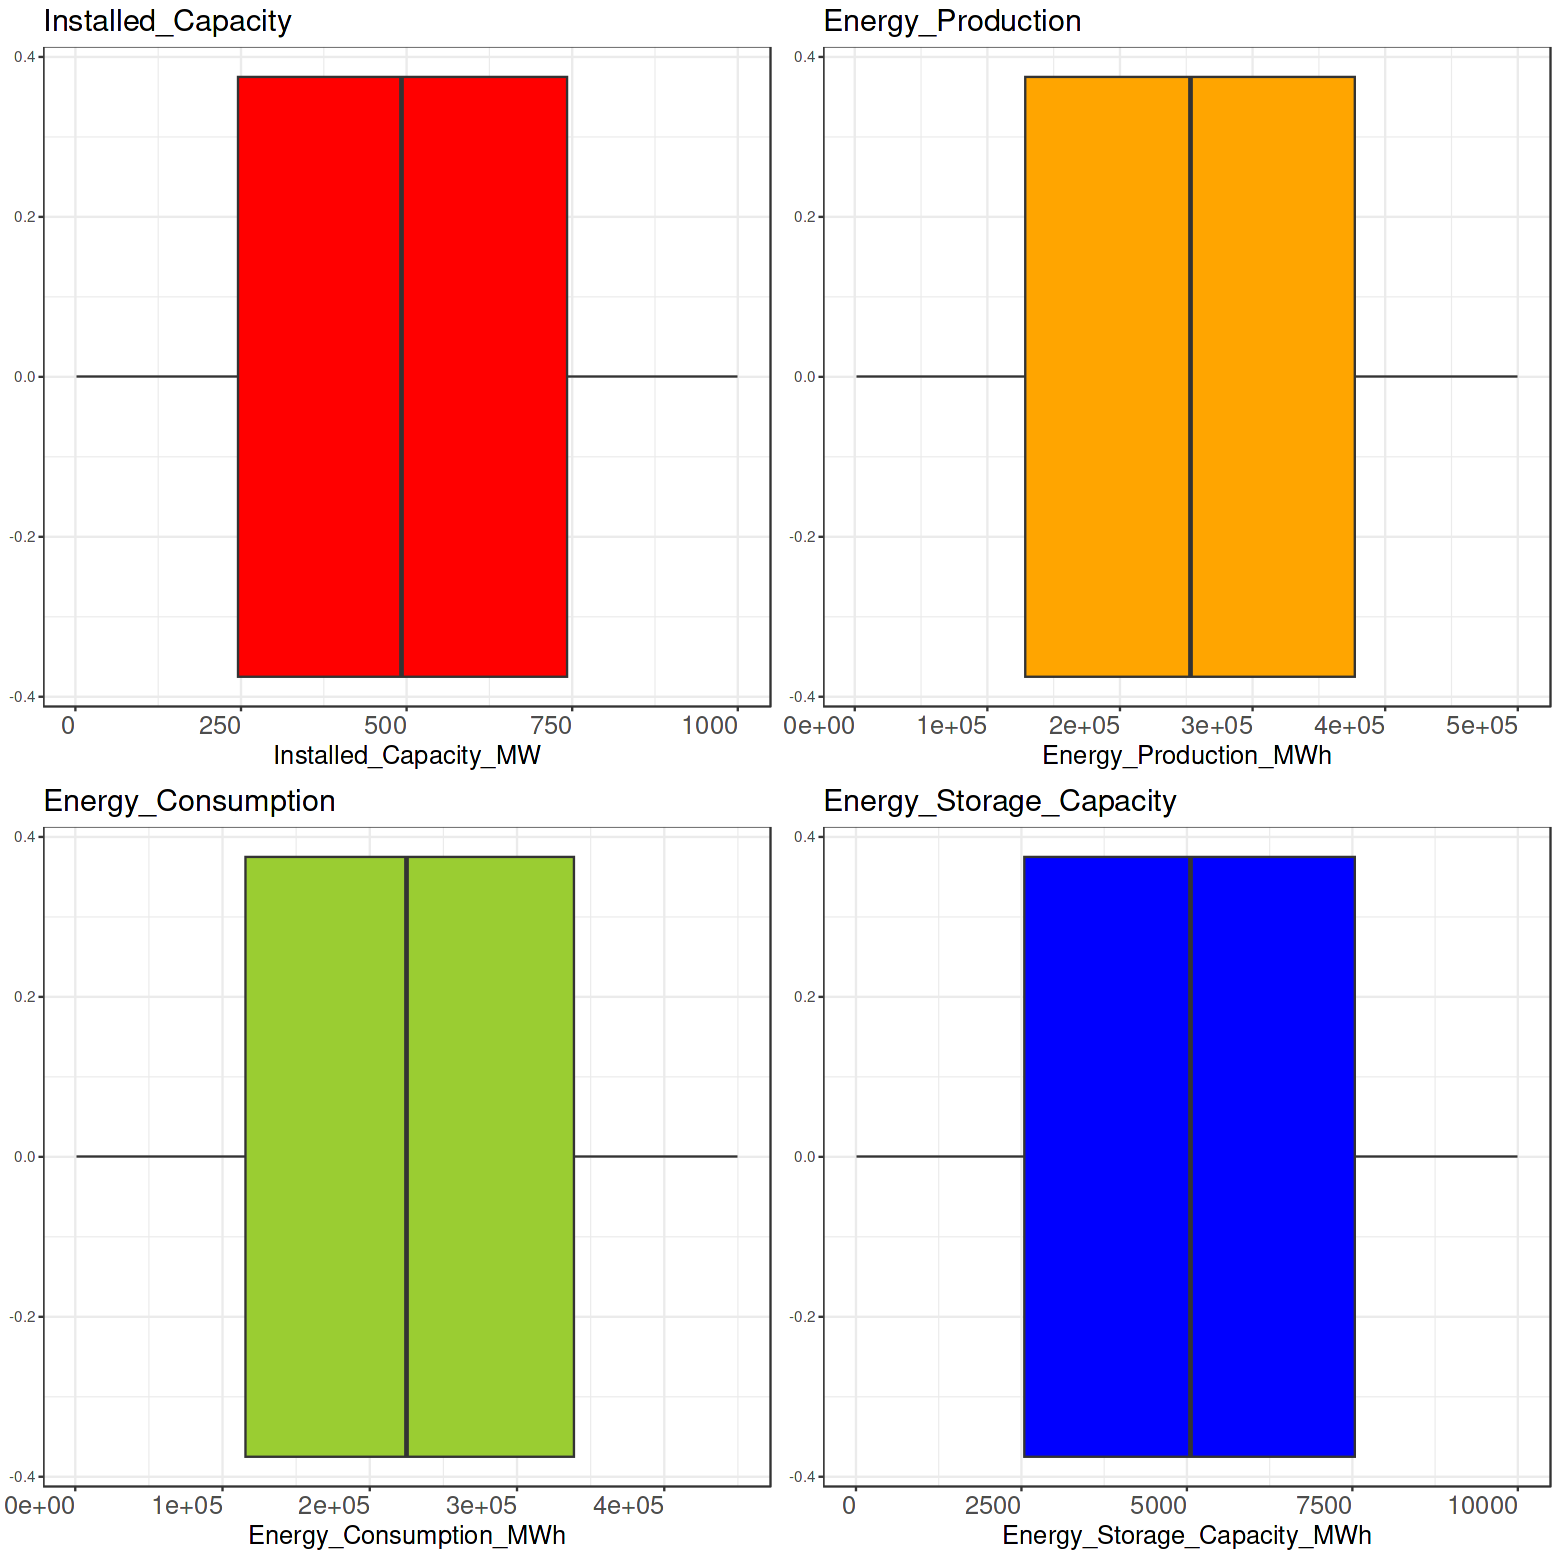

In [169]:
grid.arrange(p1,p2,p3,p4, ncol = 2)

In [170]:
p1 <- ggplot(data, aes(x = Energy_Storage_Capacity_MWh)) + 
        geom_boxplot(fill = 'red') + 
        ggtitle('Energy_Storage_Capacity') + 
        theme_bw() +
        theme(axis.title = element_text(size=15),
        axis.text.x = element_text(size = 15, hjust=1),
        title = element_text(size=15)
        )

p2 <- ggplot(data, aes(x = Storage_Efficiency_Percentage)) + 
        geom_boxplot(fill = 'orange') + 
        ggtitle('Storage_Efficiency') + 
        theme_bw() +
        theme(axis.title = element_text(size=15),
        axis.text.x = element_text(size = 15, hjust=1),
        title = element_text(size=15)
        )
p3 <- ggplot(data, aes(x = Initial_Investment_USD)) + 
        geom_boxplot(fill = 'yellow green') + 
        ggtitle('Initial_Investment') + 
        theme_bw() +
        theme(axis.title = element_text(size=15),
        axis.text.x = element_text(size = 15, hjust=1),
        title = element_text(size=15)
        )
p4 <- ggplot(data, aes(x = Financial_Incentives_USD)) + 
        geom_boxplot(fill = 'blue') + 
        ggtitle('Financial_Incentives') + 
        theme_bw() +
        theme(axis.title = element_text(size=15),
        axis.text.x = element_text(size = 15, hjust=1),
        title = element_text(size=15)
        )

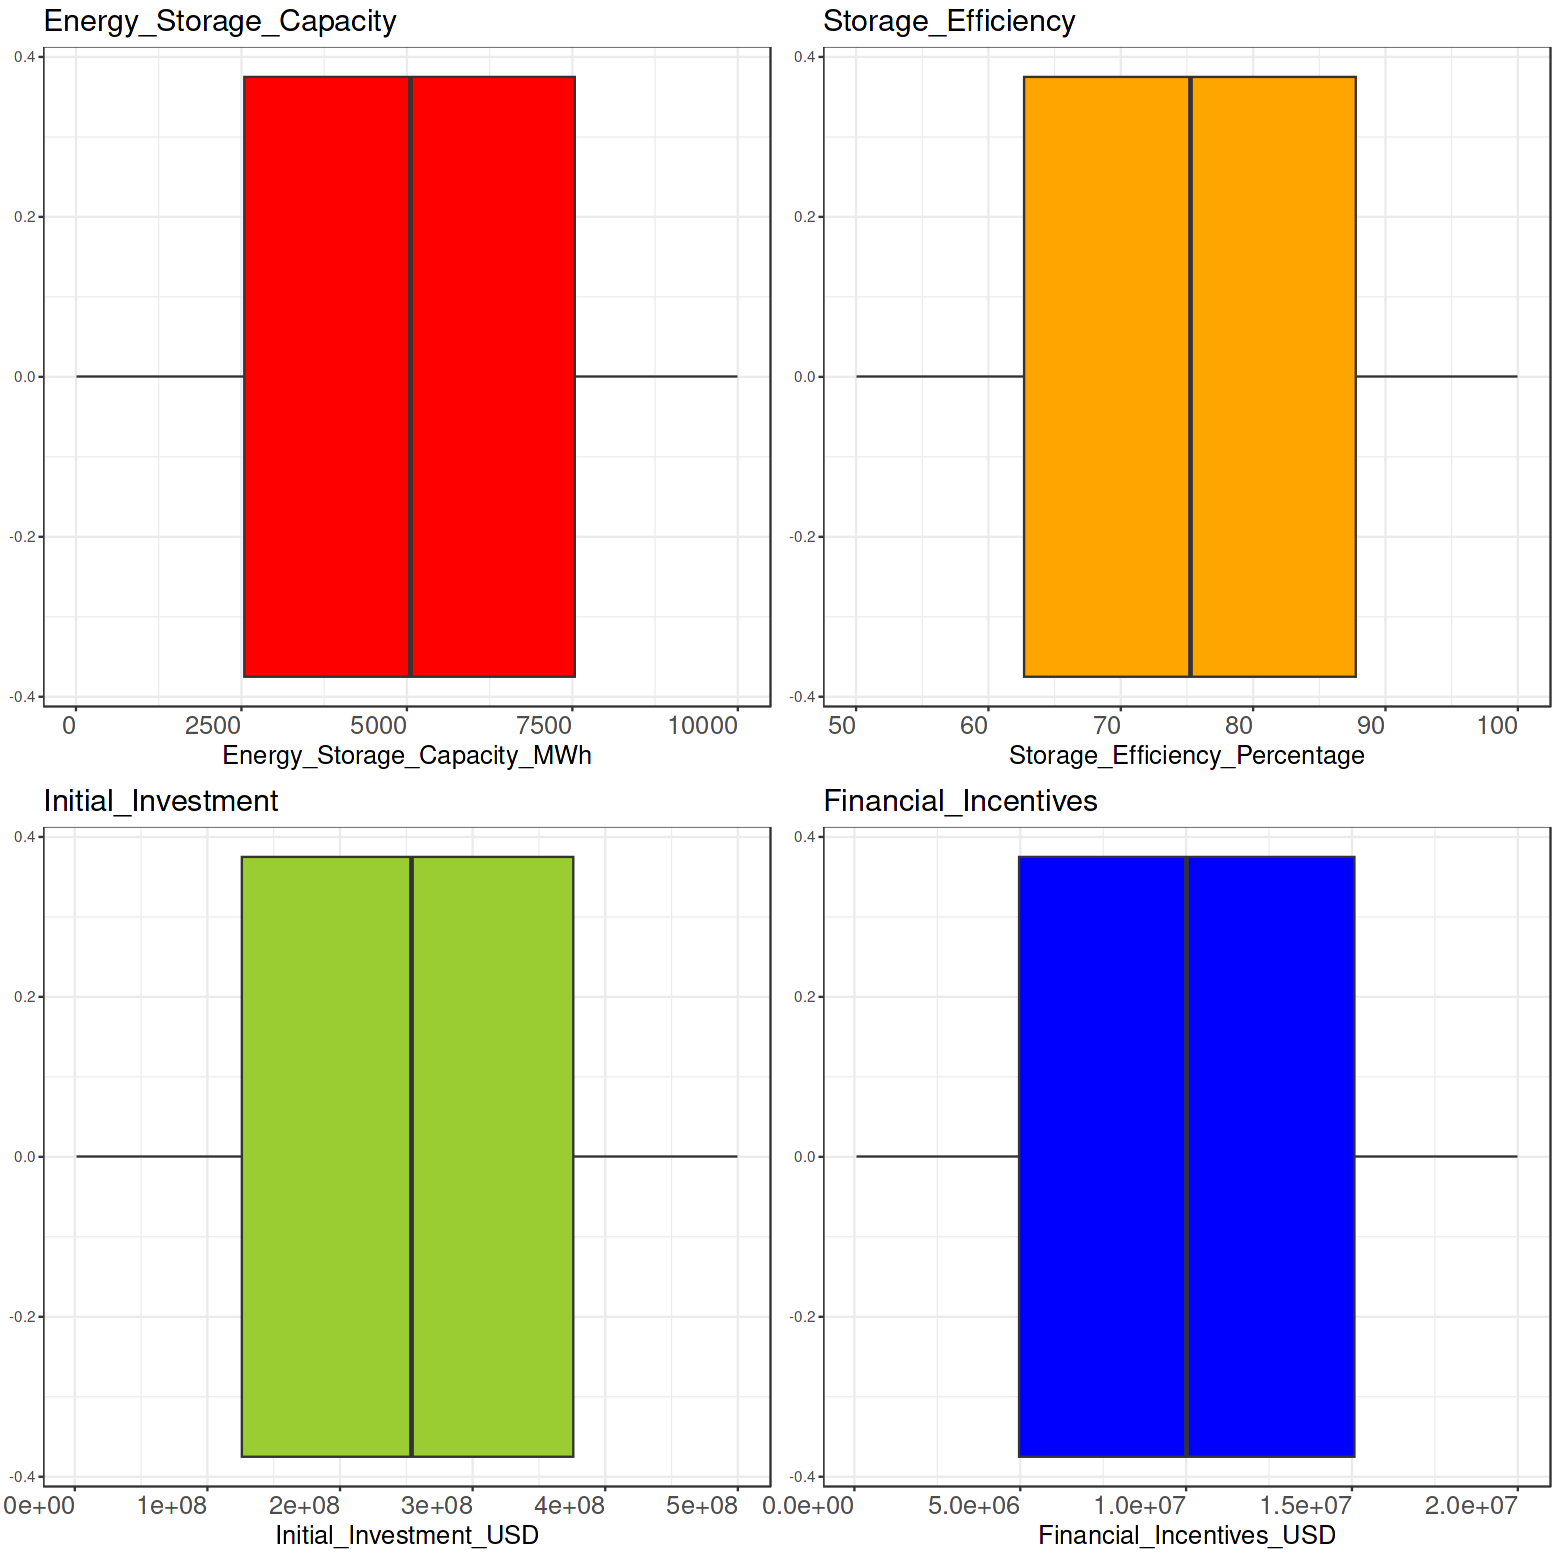

In [171]:
grid.arrange(p1,p2,p3,p4, ncol = 2)

In [172]:
p1 <- ggplot(data, aes(x = GHG_Emission_Reduction_tCO2e)) + 
        geom_boxplot(fill = 'red') + 
        ggtitle('GHG_Emission_Reduction') + 
        theme_bw() +
        theme(axis.title = element_text(size=15),
        axis.text.x = element_text(size = 15, hjust=1),
        title = element_text(size=15)
        )

p2 <- ggplot(data, aes(x = Air_Pollution_Reduction_Index)) + 
        geom_boxplot(fill = 'orange') + 
        ggtitle('Air_Pollution_Reduction') + 
        theme_bw() +
        theme(axis.title = element_text(size=15),
        axis.text.x = element_text(size = 15, hjust=1),
        title = element_text(size=15)
        )
p3 <- ggplot(data, aes(x = Jobs_Created)) + 
        geom_boxplot(fill = 'yellow green') + 
        ggtitle('Jobs_Created') + 
        theme_bw() +
        theme(axis.title = element_text(size=15),
        axis.text.x = element_text(size = 15, hjust=1),
        title = element_text(size=15)
        )

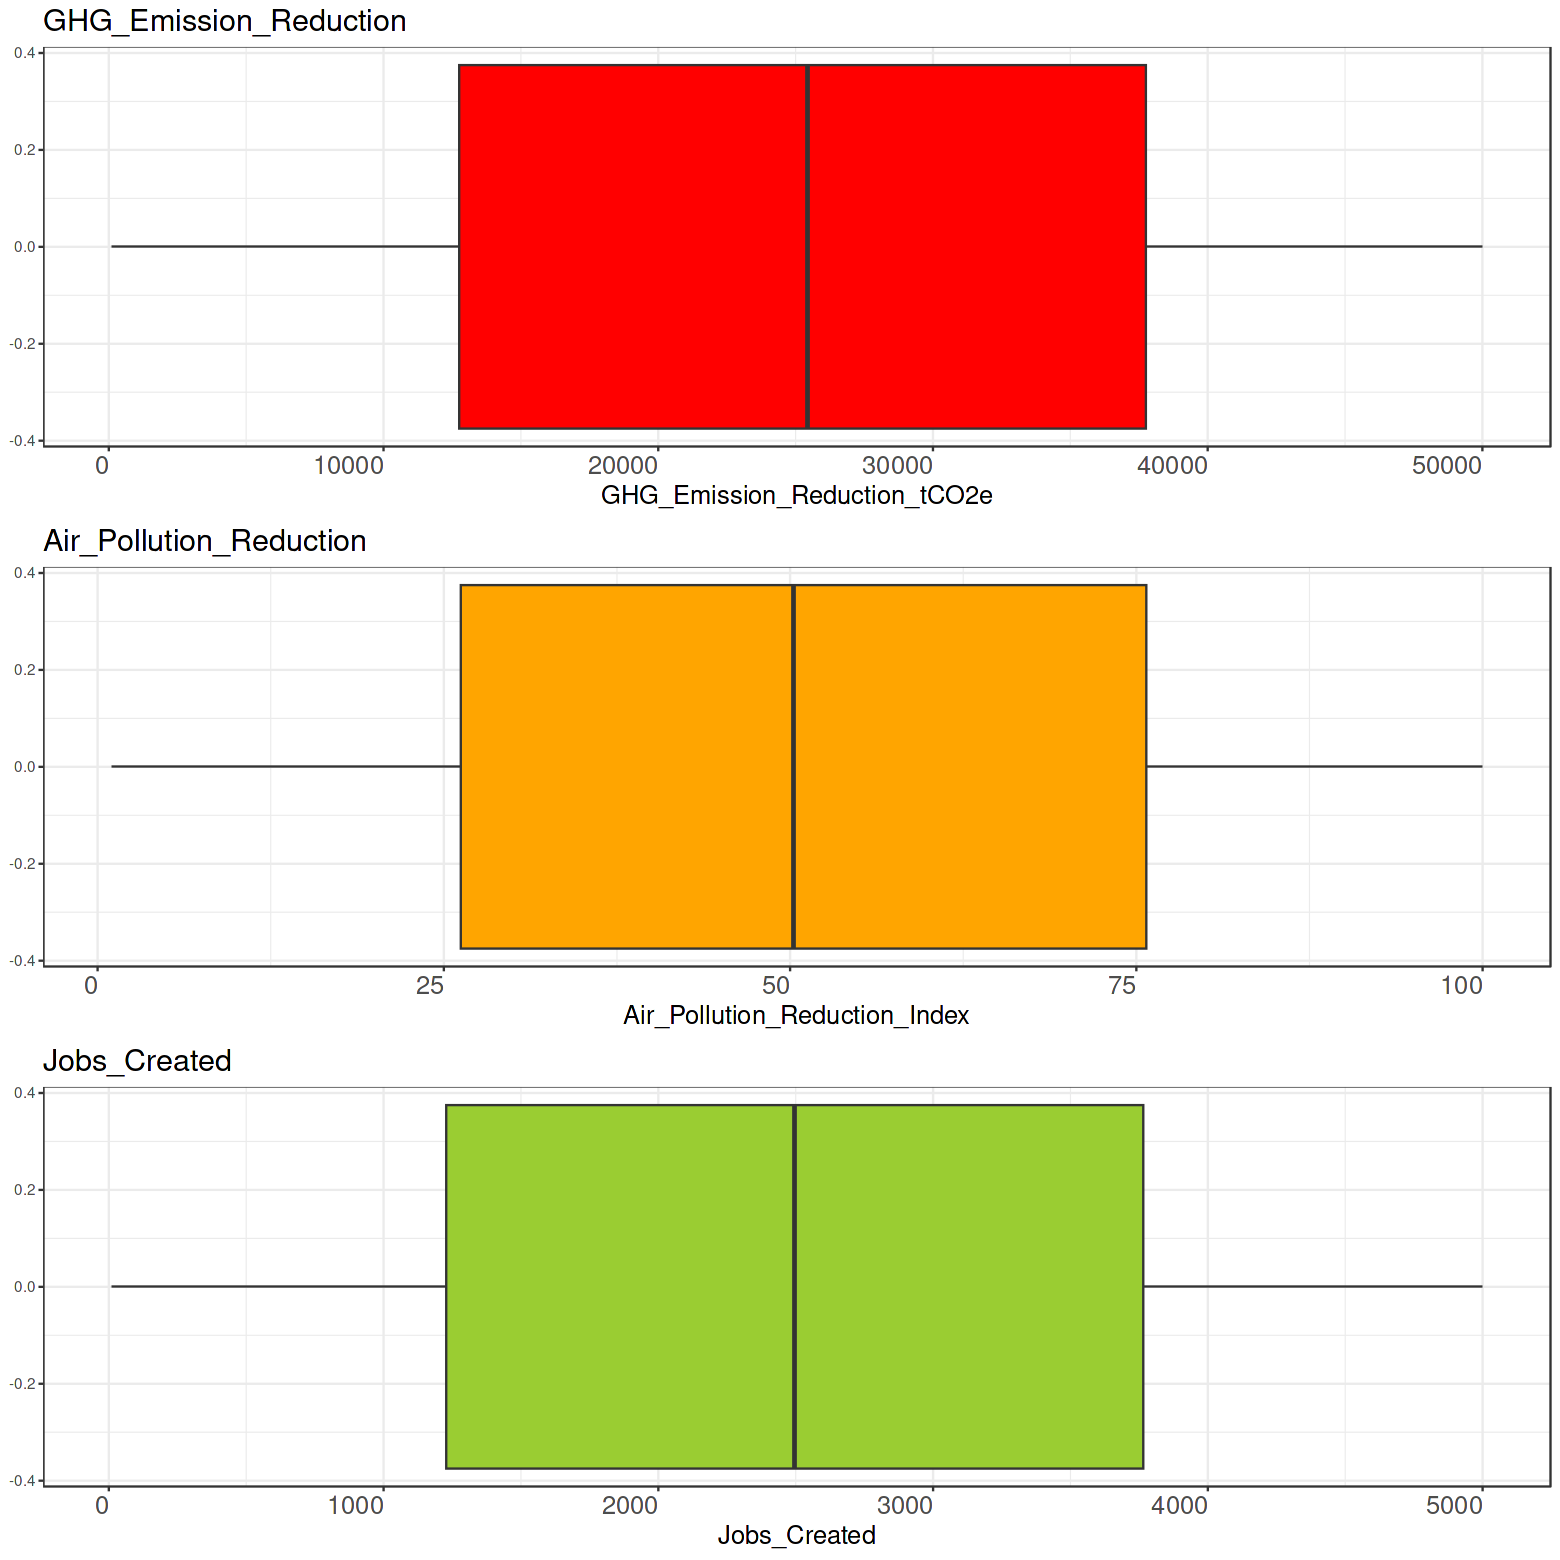

In [173]:
grid.arrange(p1,p2,p3 , ncol = 1 )

**Average Initial_Investment_USD by Categorical Variables**

In [174]:
RE_usd <- data %>% group_by(Type_of_Renewable_Energy) %>% summarize(AVG_Initial_Investment_USD = mean(Initial_Investment_USD, na.rm=T))

RE_usd$Type_of_Renewable_Energy <- as.factor(RE_usd$Type_of_Renewable_Energy)

In [175]:
RE_usd

Type_of_Renewable_Energy,AVG_Initial_Investment_USD
<fct>,<dbl>
Biomass,252811792
Geothermal,249549598
Hydroelectric,252807109
Solar,256192797
Tidal,247914250
Wave,248485399
Wind,252402157


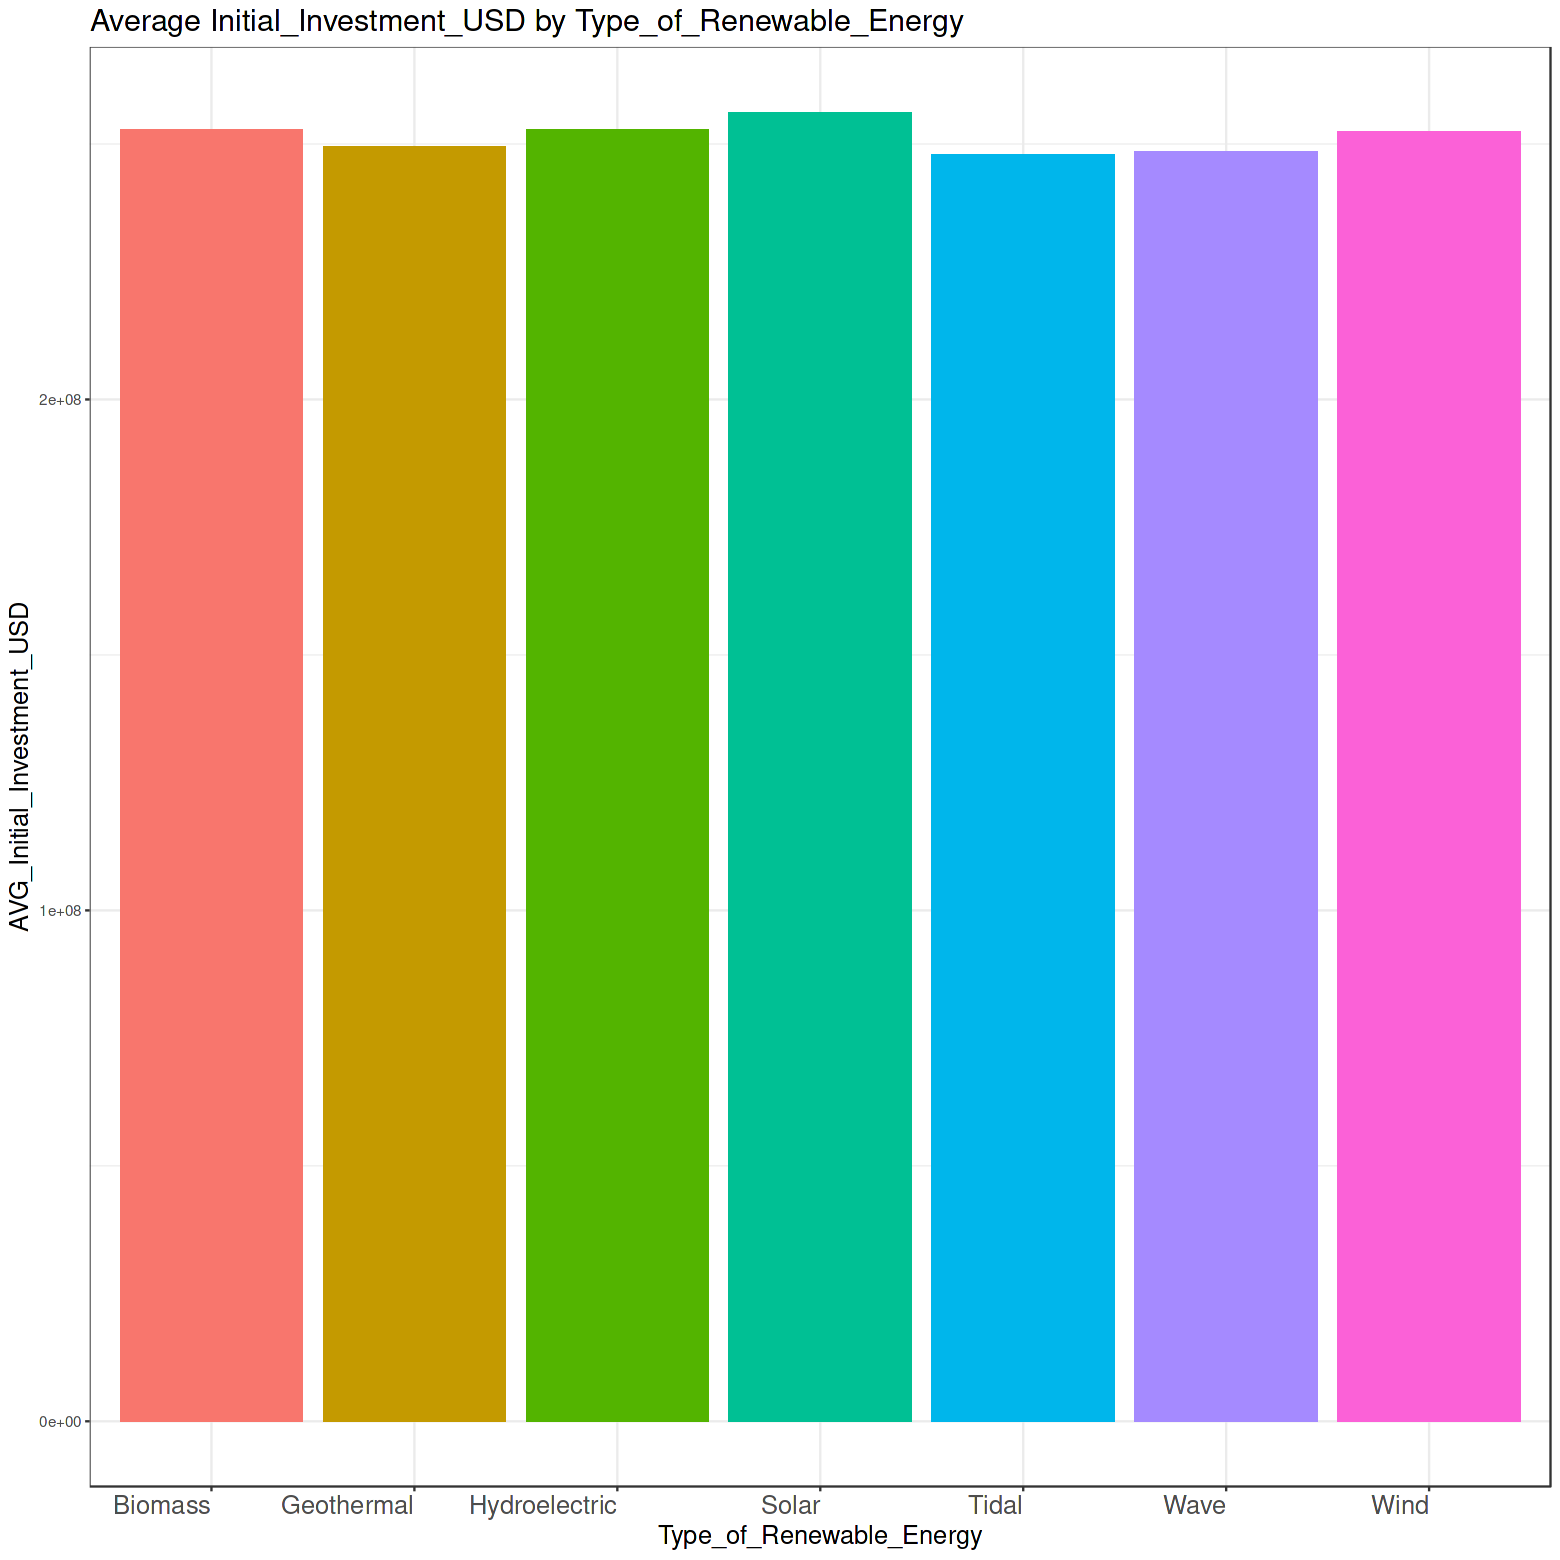

In [176]:
ggplot(RE_usd) + geom_col(aes(x= Type_of_Renewable_Energy, y= AVG_Initial_Investment_USD,  fill =Type_of_Renewable_Energy)) +
    ggtitle('Average Initial_Investment_USD by Type_of_Renewable_Energy')+
    theme_bw() +
    theme(
    legend.position = 'none',
    axis.title = element_text(size=15),
    axis.text.x = element_text(size = 15, hjust=1),
    title = element_text(size=15)
    )

In [177]:
gi_usd <- data %>% group_by(Grid_Integration_Level) %>% summarize(AVG_Initial_Investment_USD = mean(Initial_Investment_USD, na.rm=T))    

gi_usd$Grid_Integration_Level <- as.factor(gi_usd$Grid_Integration_Level)

In [178]:
gi_usd

Grid_Integration_Level,AVG_Initial_Investment_USD
<fct>,<dbl>
Full Integration,252798464
Isolated Microgrid,250351612
Minimal Integration,254145072
Partial Integration,248570266


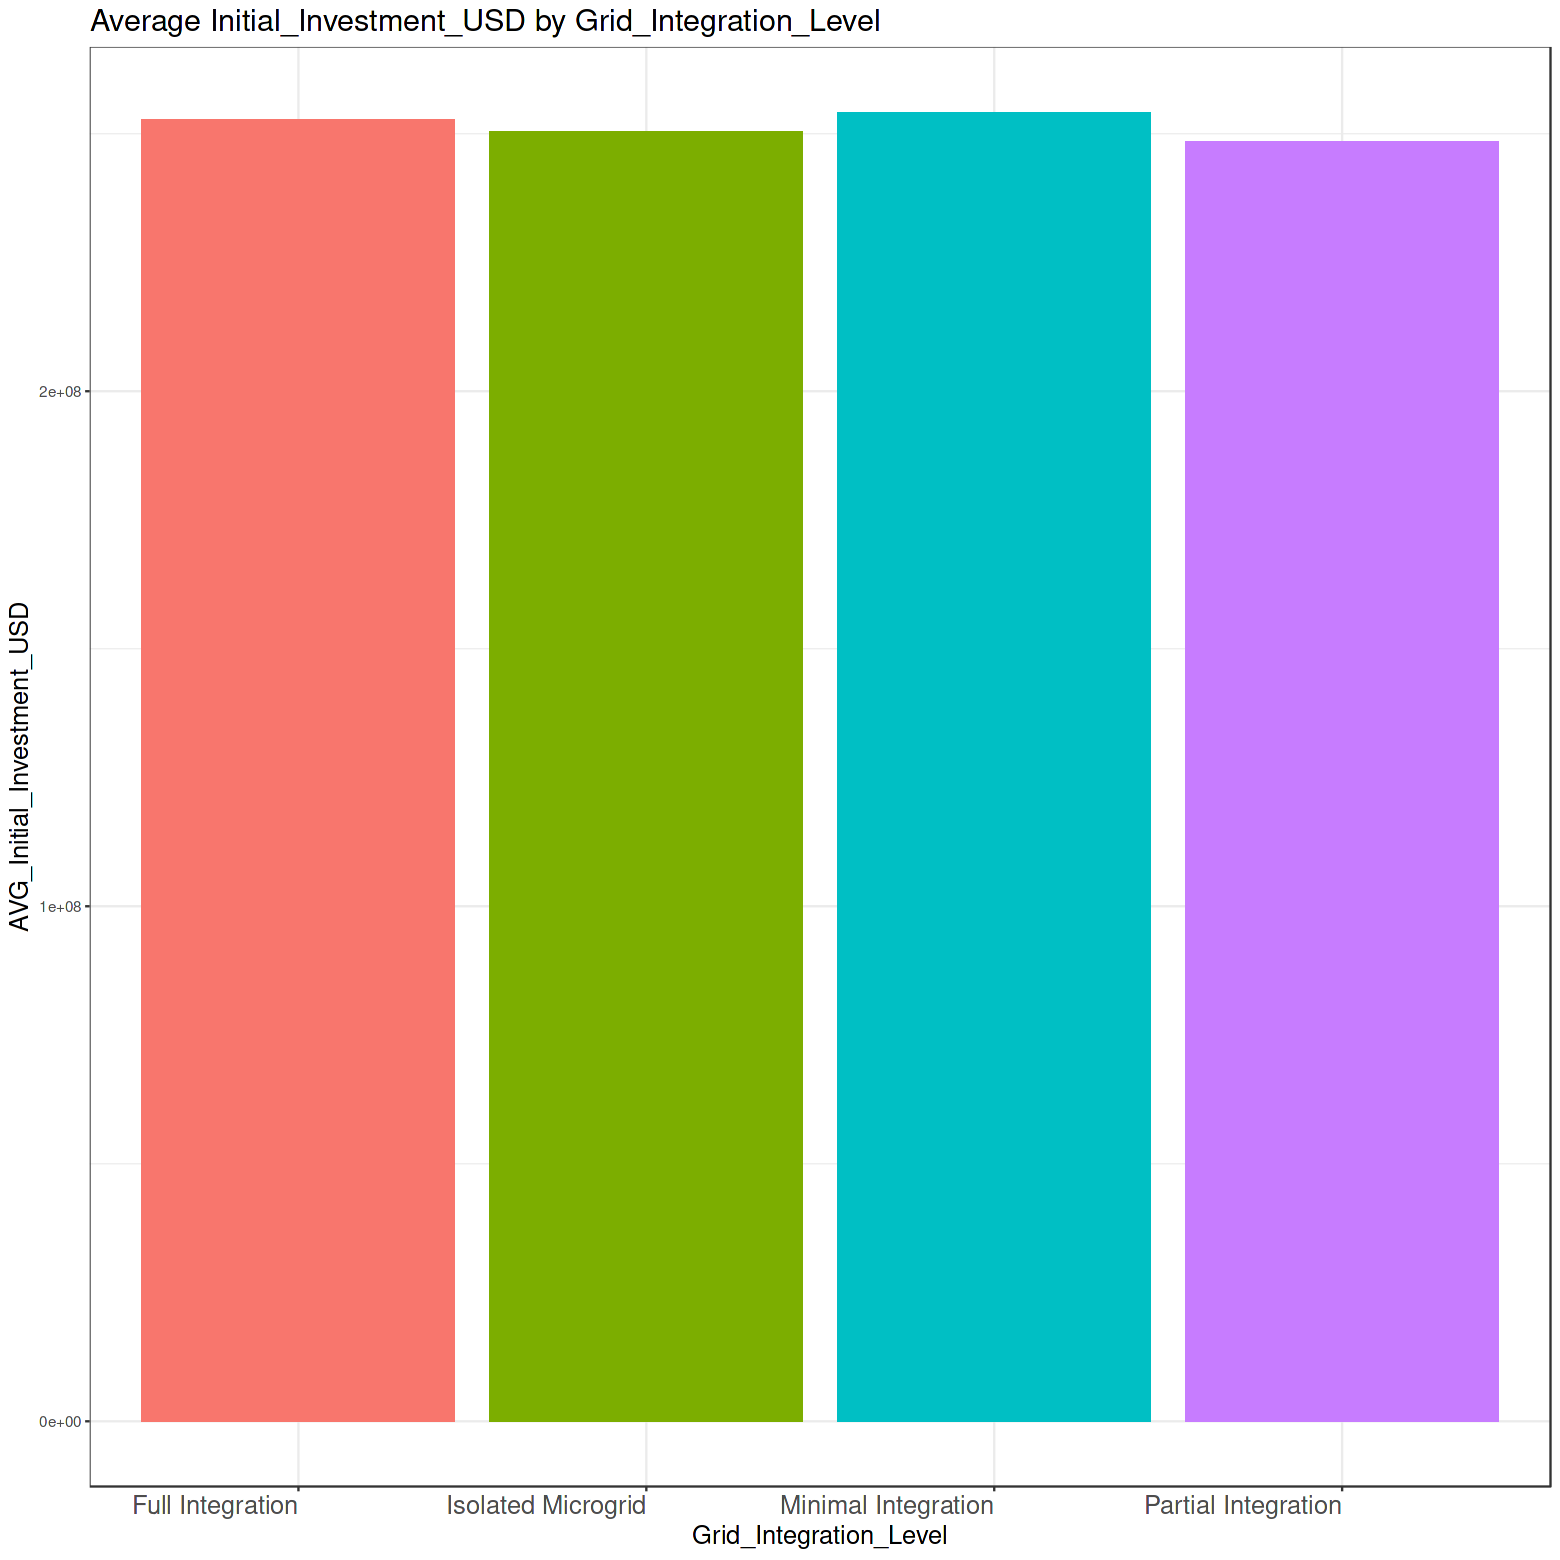

In [179]:
ggplot(gi_usd) + geom_col(aes(x= Grid_Integration_Level, y= AVG_Initial_Investment_USD,  fill = Grid_Integration_Level)) +
    ggtitle('Average Initial_Investment_USD by Grid_Integration_Level')+
    theme_bw() +
    theme(
    legend.position = 'none',
    axis.title = element_text(size=15),
    axis.text.x = element_text(size = 15, hjust=1),
    title = element_text(size=15)
    )

In [180]:
FS_usd <- data %>% group_by(Funding_Sources) %>% summarize(AVG_Initial_Investment_USD = mean(Initial_Investment_USD, na.rm=T)) 

FS_usd$Funding_Sources <- as.factor(FS_usd$Funding_Sources)

In [181]:
FS_usd

Funding_Sources,AVG_Initial_Investment_USD
<fct>,<dbl>
Government,253642603
Private,248592603
Public-Private,252207354


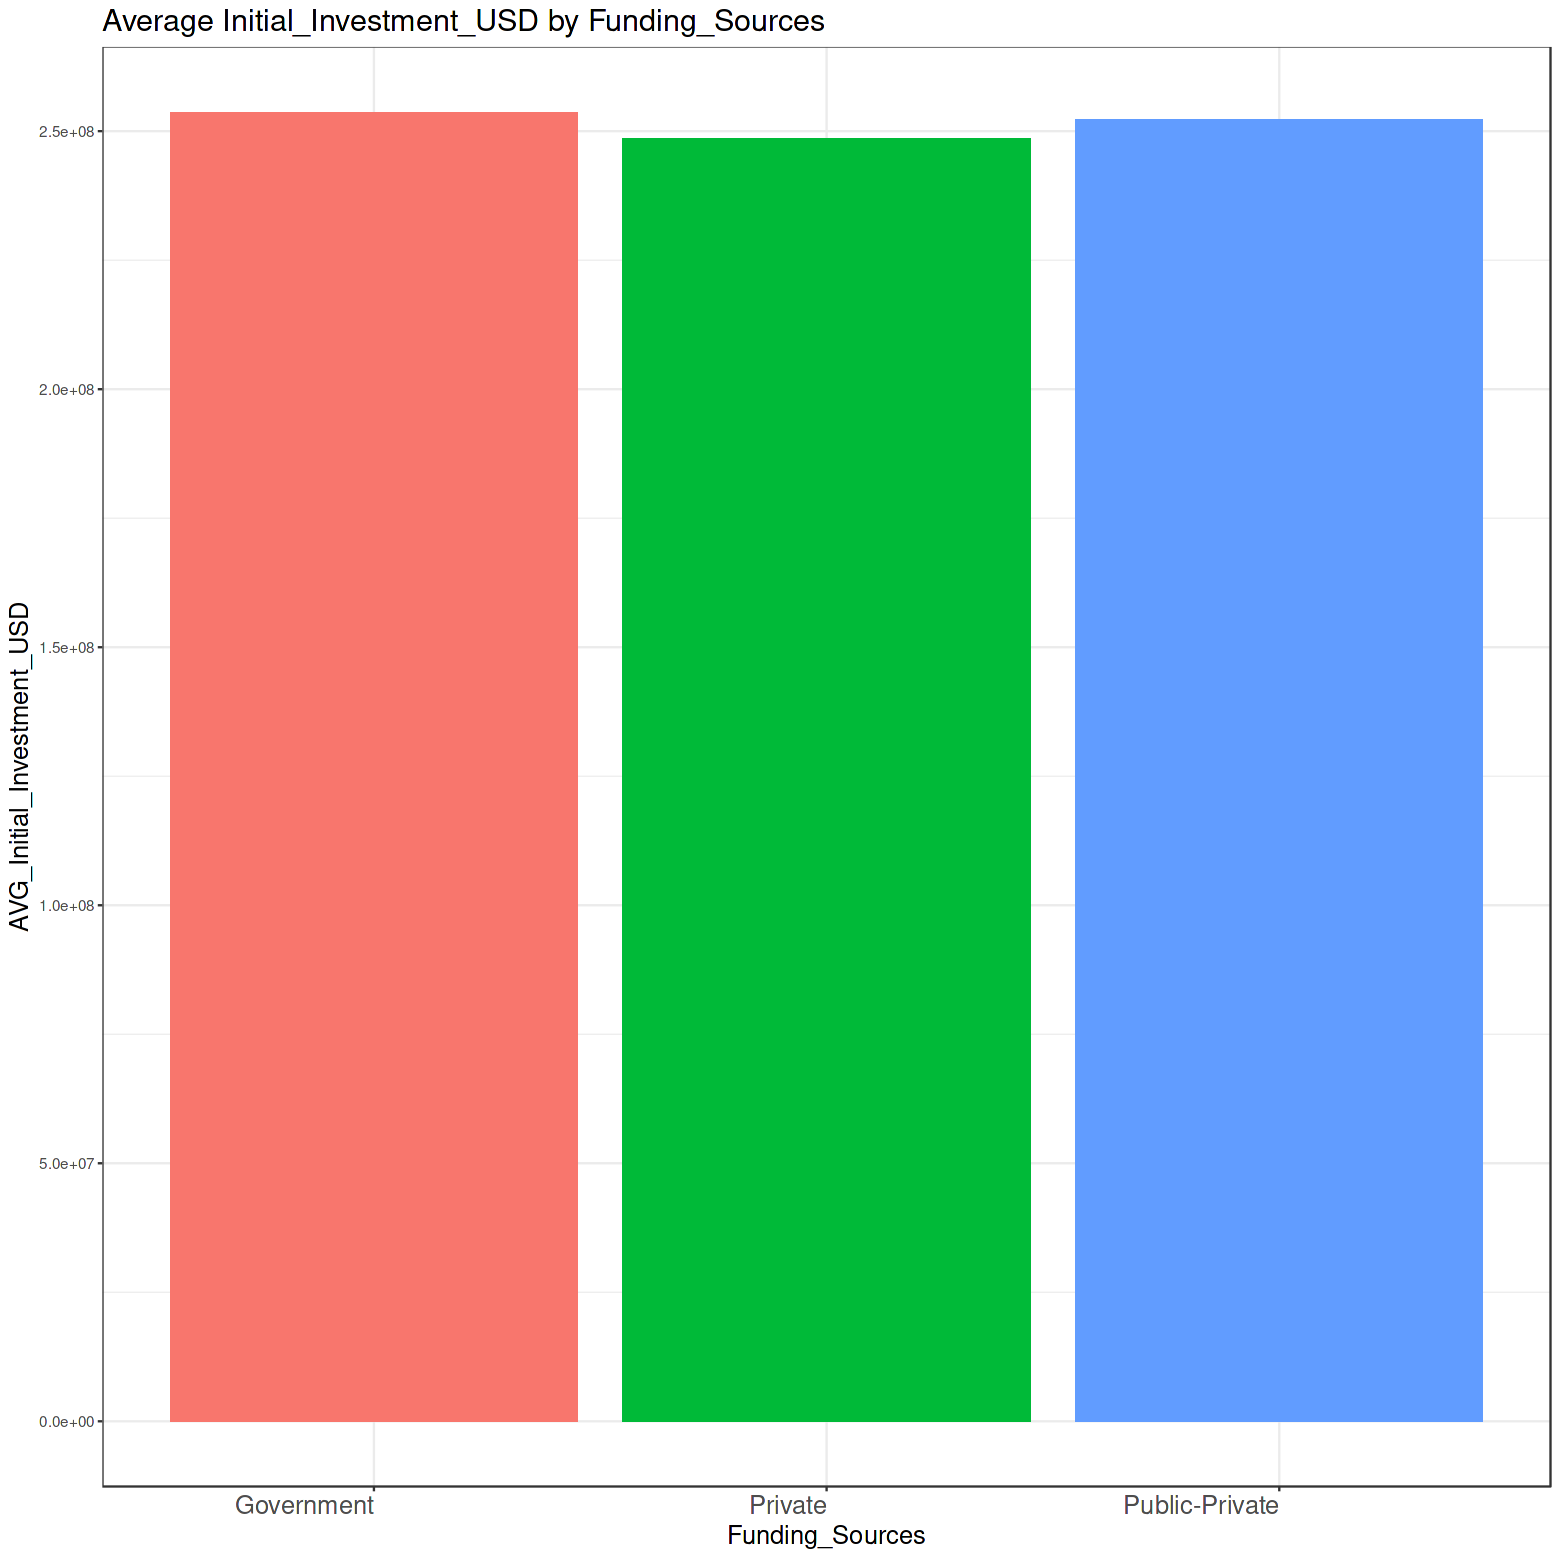

In [211]:
ggplot(FS_usd) + geom_col(aes(x= Funding_Sources, y= AVG_Initial_Investment_USD,  fill = Funding_Sources)) +
    ggtitle('Average Initial_Investment_USD by Funding_Sources')+
    theme_bw() +
    theme(
    legend.position = 'none',
    axis.title = element_text(size=15),
    axis.text.x = element_text(size = 15, hjust=1),
    title = element_text(size=15)
    )

**Average GHG_Emission_Recision_tCO2e by Type_of_Renewable_Energy**

In [183]:
RE_tCO2e <- data %>% group_by(Type_of_Renewable_Energy) %>% summarize(AVG_GHG_Emission_Reduction_tCO2e = mean(GHG_Emission_Reduction_tCO2e, na.rm=T))

RE_tCO2e$Type_of_Renewable_Energy <- as.factor(RE_tCO2e$Type_of_Renewable_Energy)

In [184]:
RE_tCO2e

Type_of_Renewable_Energy,AVG_GHG_Emission_Reduction_tCO2e
<fct>,<dbl>
Biomass,25645.69
Geothermal,25070.53
Hydroelectric,25304.02
Solar,24666.65
Tidal,25516.90
Wave,25282.79
Wind,25164.22


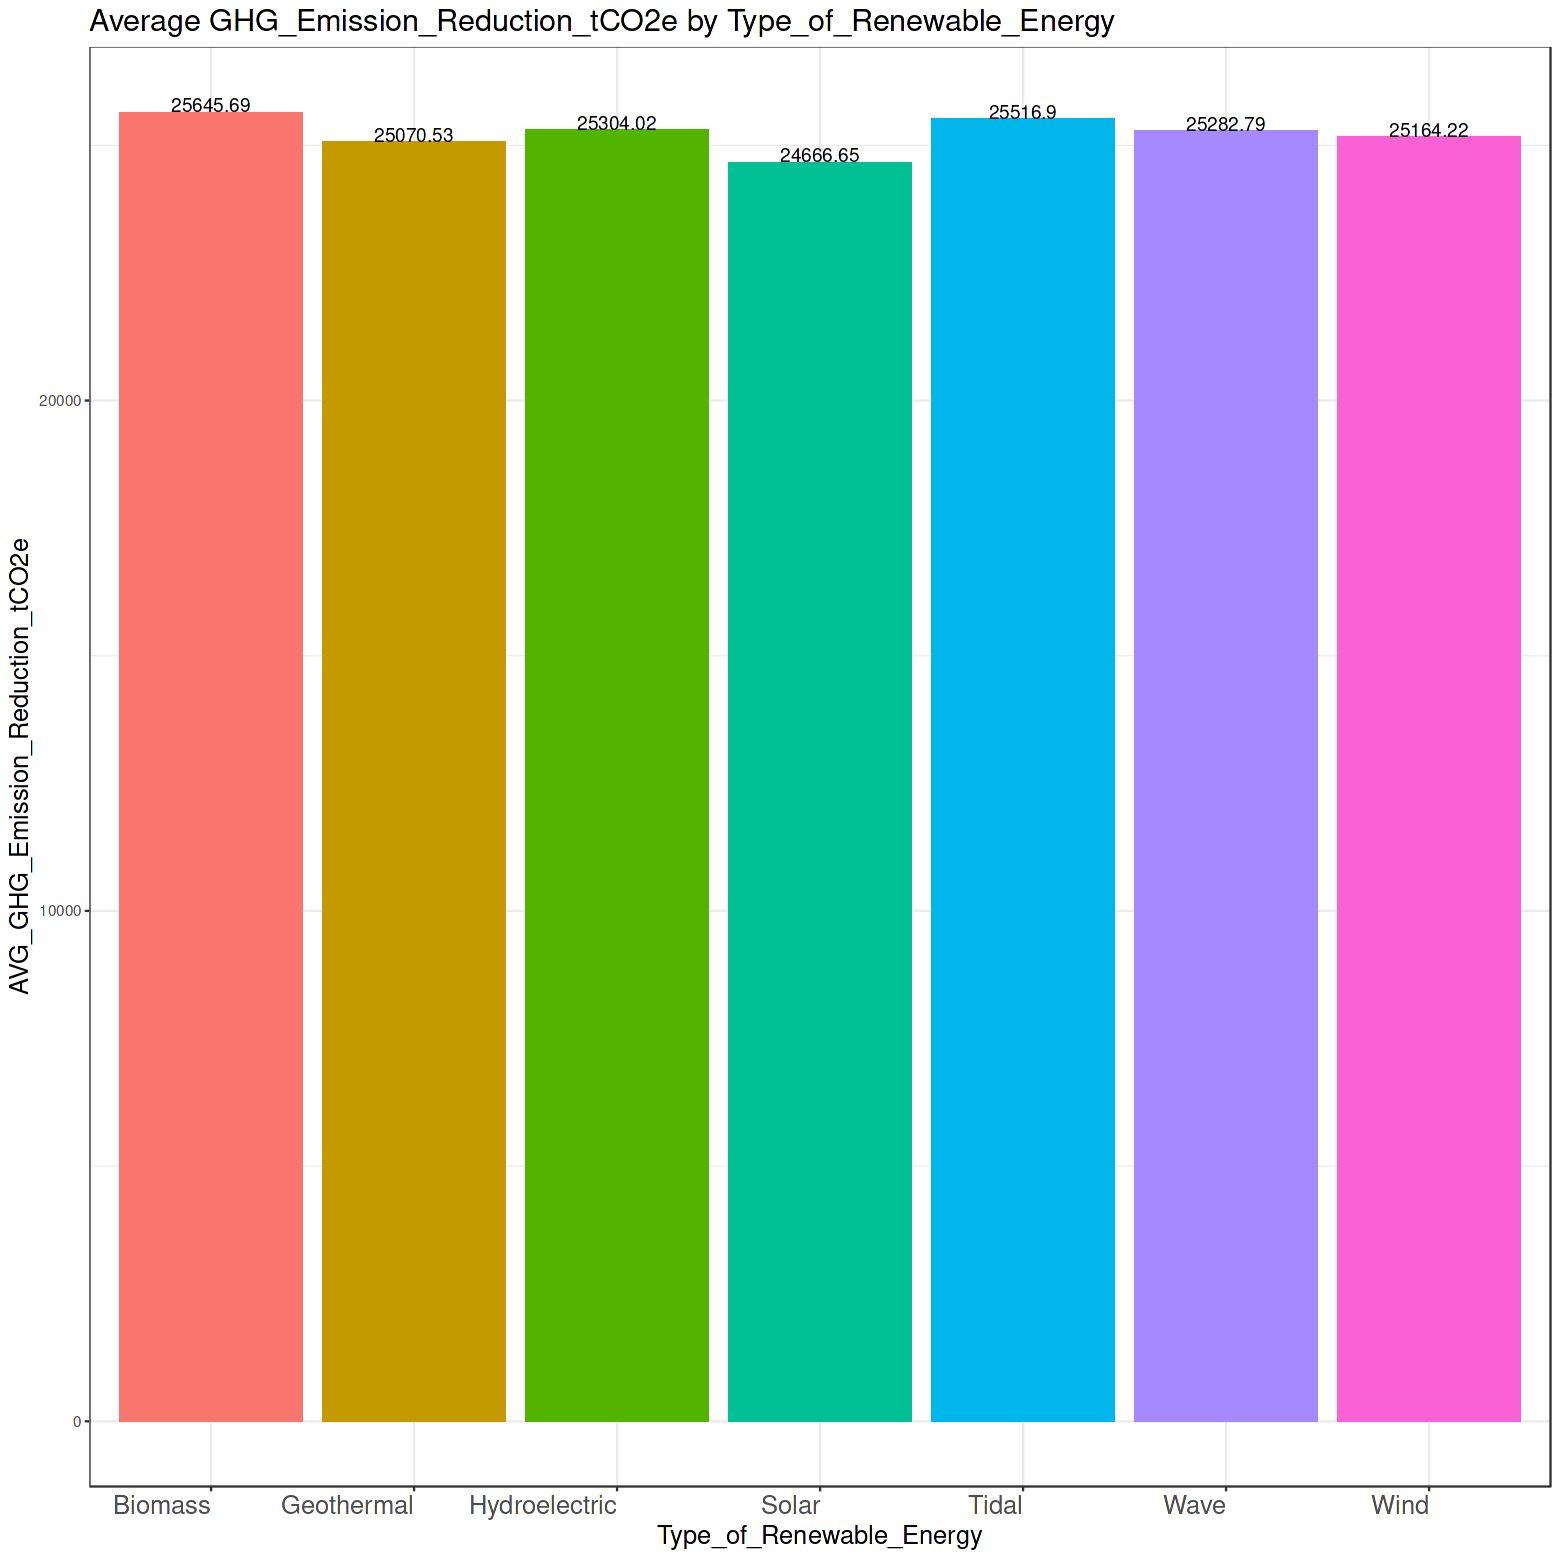

In [204]:
ggplot(RE_tCO2e) + geom_col(aes(x= Type_of_Renewable_Energy, y= AVG_GHG_Emission_Reduction_tCO2e,  fill = Type_of_Renewable_Energy)) +
    geom_text(aes(x=Type_of_Renewable_Energy , y= AVG_GHG_Emission_Reduction_tCO2e, label= round(AVG_GHG_Emission_Reduction_tCO2e,2), vjust=0)) +
    ggtitle('Average GHG_Emission_Reduction_tCO2e by Type_of_Renewable_Energy')+
    theme_bw() +
    theme(
    legend.position = 'none',
    axis.title = element_text(size=15),
    axis.text.x = element_text(size = 15, hjust=1),
    title = element_text(size=15)
    )

**Average Air_Pollution_Reduction_Index by Type_of_Renewable_Energy**

In [186]:
RE_Air <- data %>% group_by(Type_of_Renewable_Energy) %>% summarize(AVG_Air_Pollution_Reduction_Index = mean(Air_Pollution_Reduction_Index, na.rm=T)) 

RE_Air$Type_of_Renewable_Energy <- as.factor(RE_Air$Type_of_Renewable_Energy)

In [187]:
RE_Air

Type_of_Renewable_Energy,AVG_Air_Pollution_Reduction_Index
<fct>,<dbl>
Biomass,50.77855
Geothermal,51.34773
Hydroelectric,50.94006
Solar,51.61287
Tidal,49.95748
Wave,50.59434
Wind,49.85111


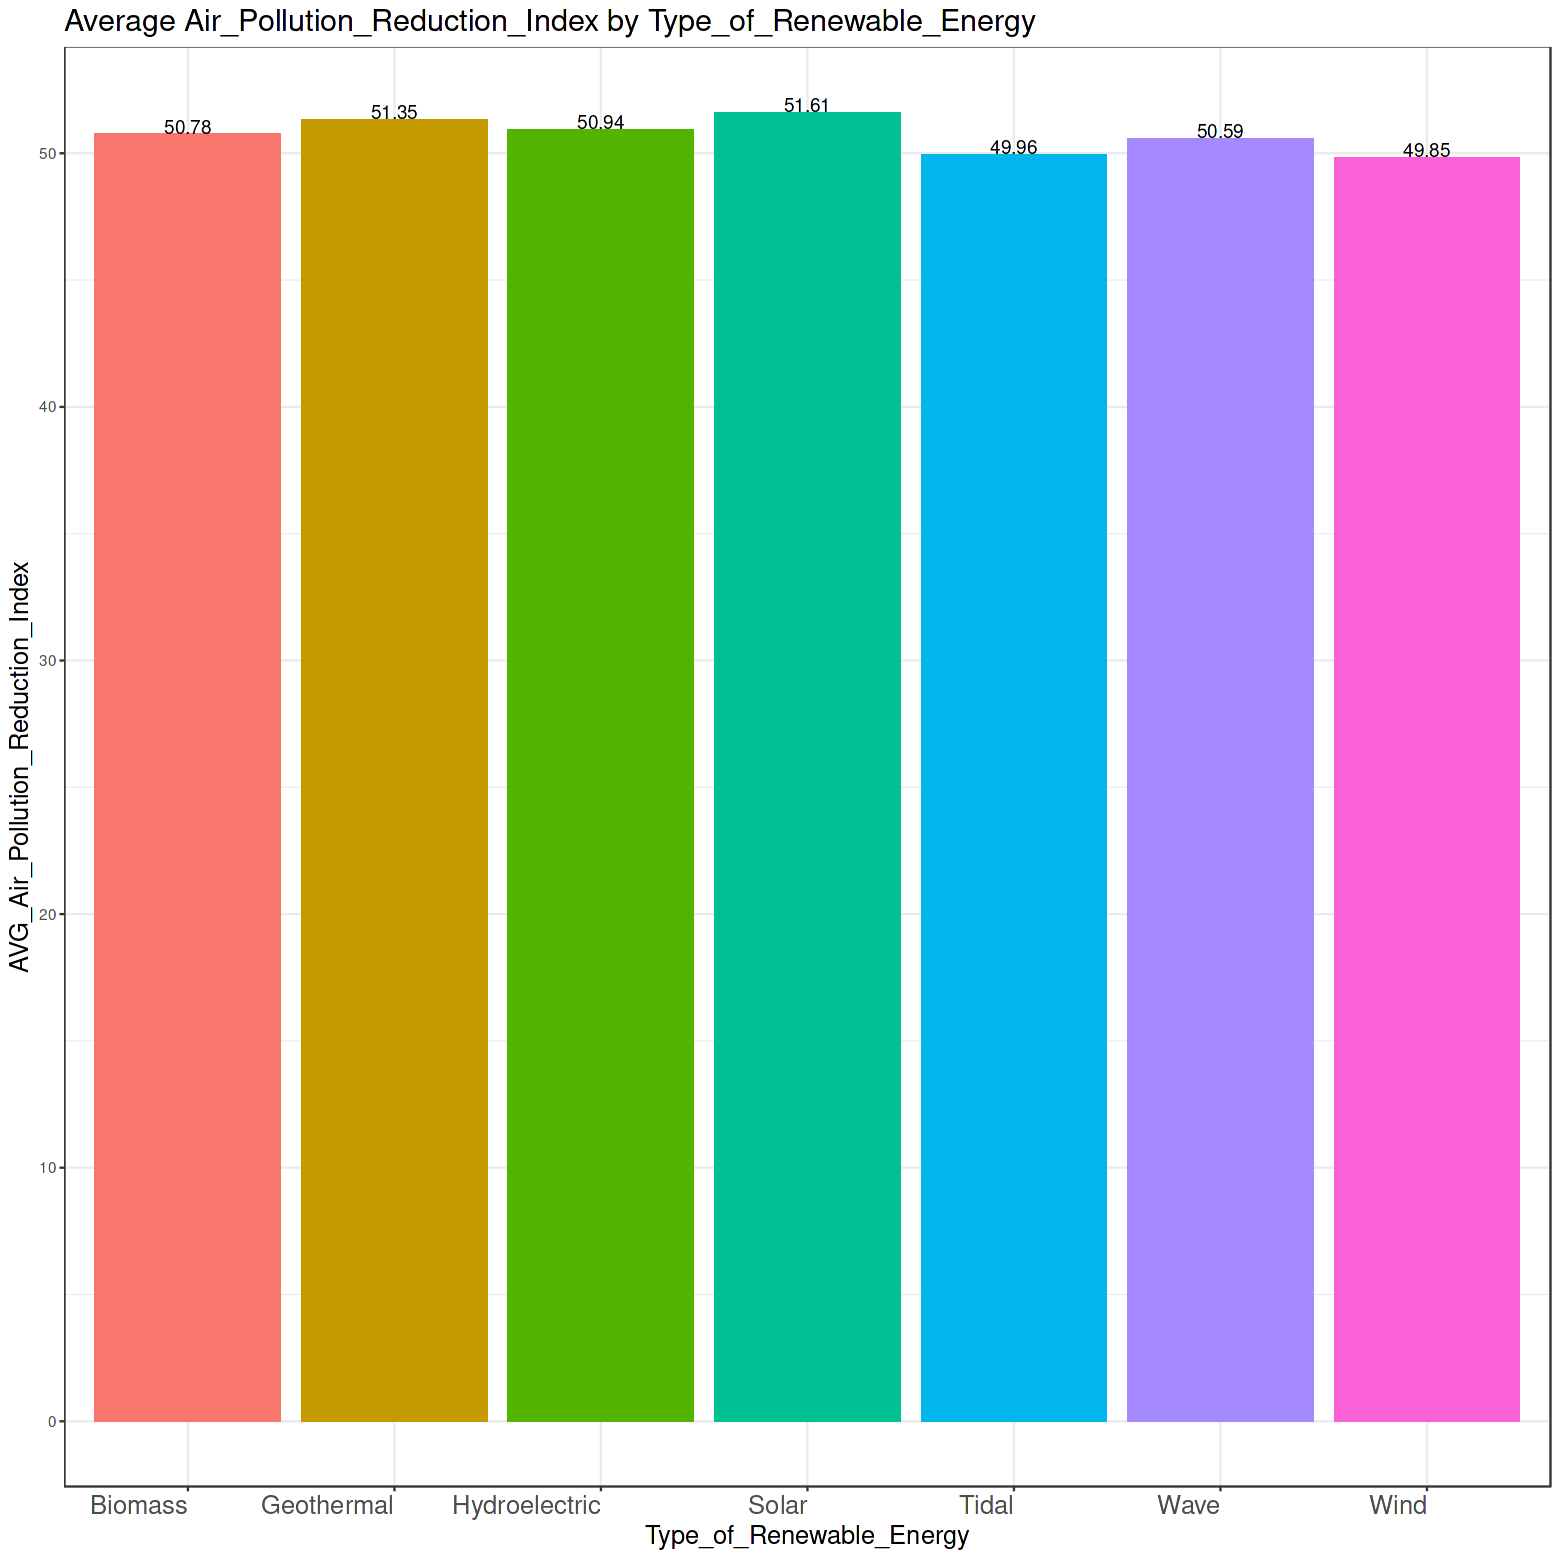

In [203]:
ggplot(RE_Air) + geom_col(aes(x= Type_of_Renewable_Energy, y= AVG_Air_Pollution_Reduction_Index,  fill = Type_of_Renewable_Energy)) +
    geom_text(aes(x=Type_of_Renewable_Energy , y= AVG_Air_Pollution_Reduction_Index, label= round(AVG_Air_Pollution_Reduction_Index,2), vjust=0)) +
    ggtitle('Average Air_Pollution_Reduction_Index by Type_of_Renewable_Energy')+
    theme_bw() +
    theme(
    legend.position = 'none',
    axis.title = element_text(size=15),
    axis.text.x = element_text(size = 15, hjust=1),
    title = element_text(size=15)
    )

**Average Energy_Consumption_MWh by Type_of_Renewable_Energy**

In [198]:
RE_EC <- data %>% group_by(Type_of_Renewable_Energy) %>% summarize(AVG_Energy_Consumption_MWh = mean(Storage_Efficiency_Percentage, na.rm=T))

In [199]:
RE_EC

Type_of_Renewable_Energy,AVG_Energy_Consumption_MWh
<chr>,<dbl>
Biomass,75.21163
Geothermal,74.88836
Hydroelectric,74.68648
Solar,75.32930
Tidal,75.43710
Wave,75.15202
Wind,75.81083


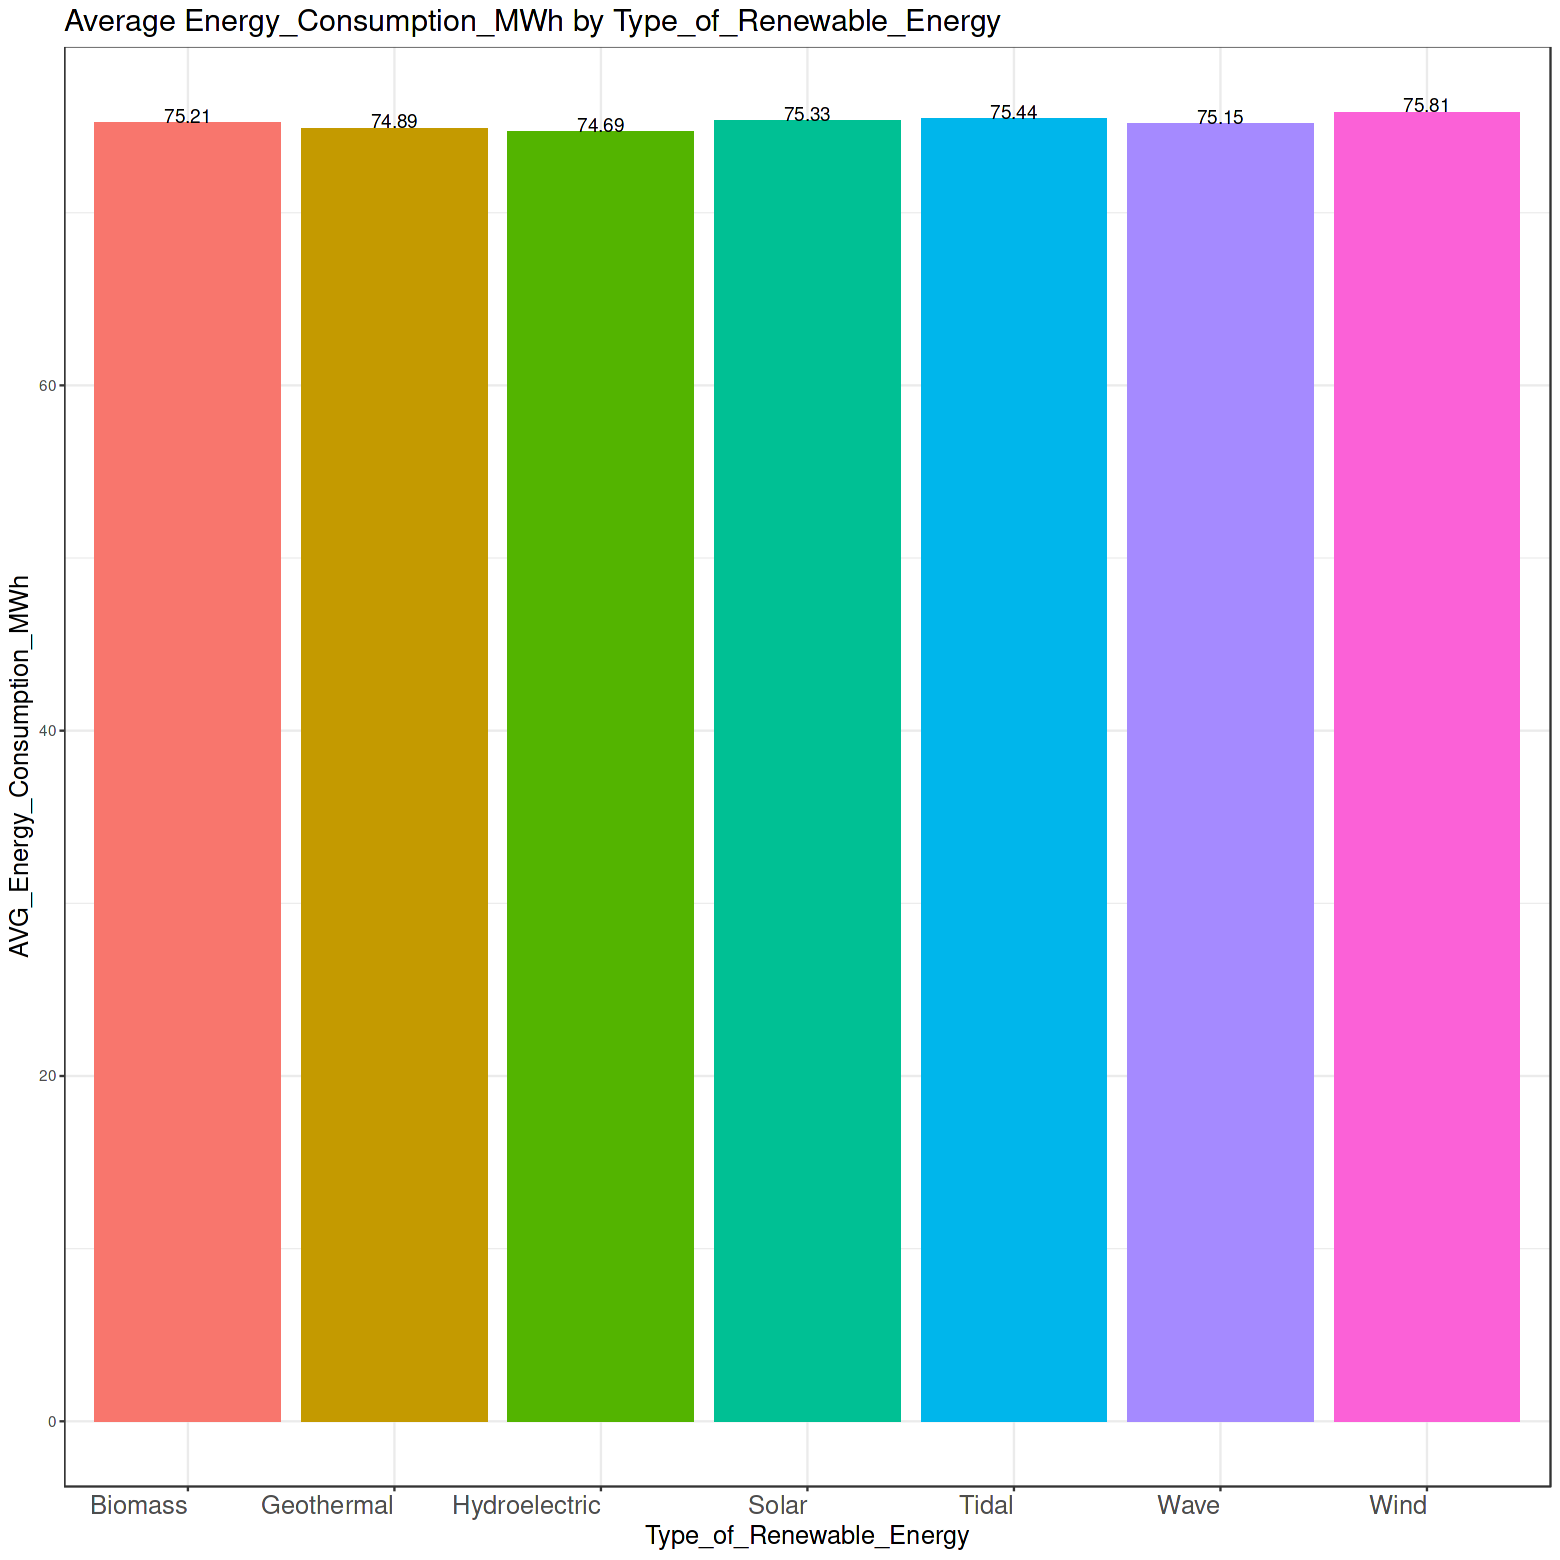

In [202]:
ggplot(RE_EC) + geom_col(aes(x= Type_of_Renewable_Energy, y= AVG_Energy_Consumption_MWh,  fill = Type_of_Renewable_Energy)) +
    geom_text(aes(x=Type_of_Renewable_Energy , y= AVG_Energy_Consumption_MWh, label= round(AVG_Energy_Consumption_MWh,2), vjust=0)) +
    ggtitle('Average Energy_Consumption_MWh by Type_of_Renewable_Energy')+
    theme_bw() +
    theme(
    legend.position = 'none',
    axis.title = element_text(size=15),
    axis.text.x = element_text(size = 15, hjust=1),
    title = element_text(size=15)
    )

**Average Energy_Production_MWh by Type_of_Renewable_Energy**

In [205]:
RE_EP <- data %>% group_by(Type_of_Renewable_Energy) %>% summarize(AVG_Energy_Production_MWh = mean(Energy_Production_MWh, na.rm=T))

In [206]:
RE_EP

Type_of_Renewable_Energy,AVG_Energy_Production_MWh
<chr>,<dbl>
Biomass,252599.4
Geothermal,252893.8
Hydroelectric,251070.4
Solar,252813.7
Tidal,254210.9
Wave,252571.0
Wind,250384.8


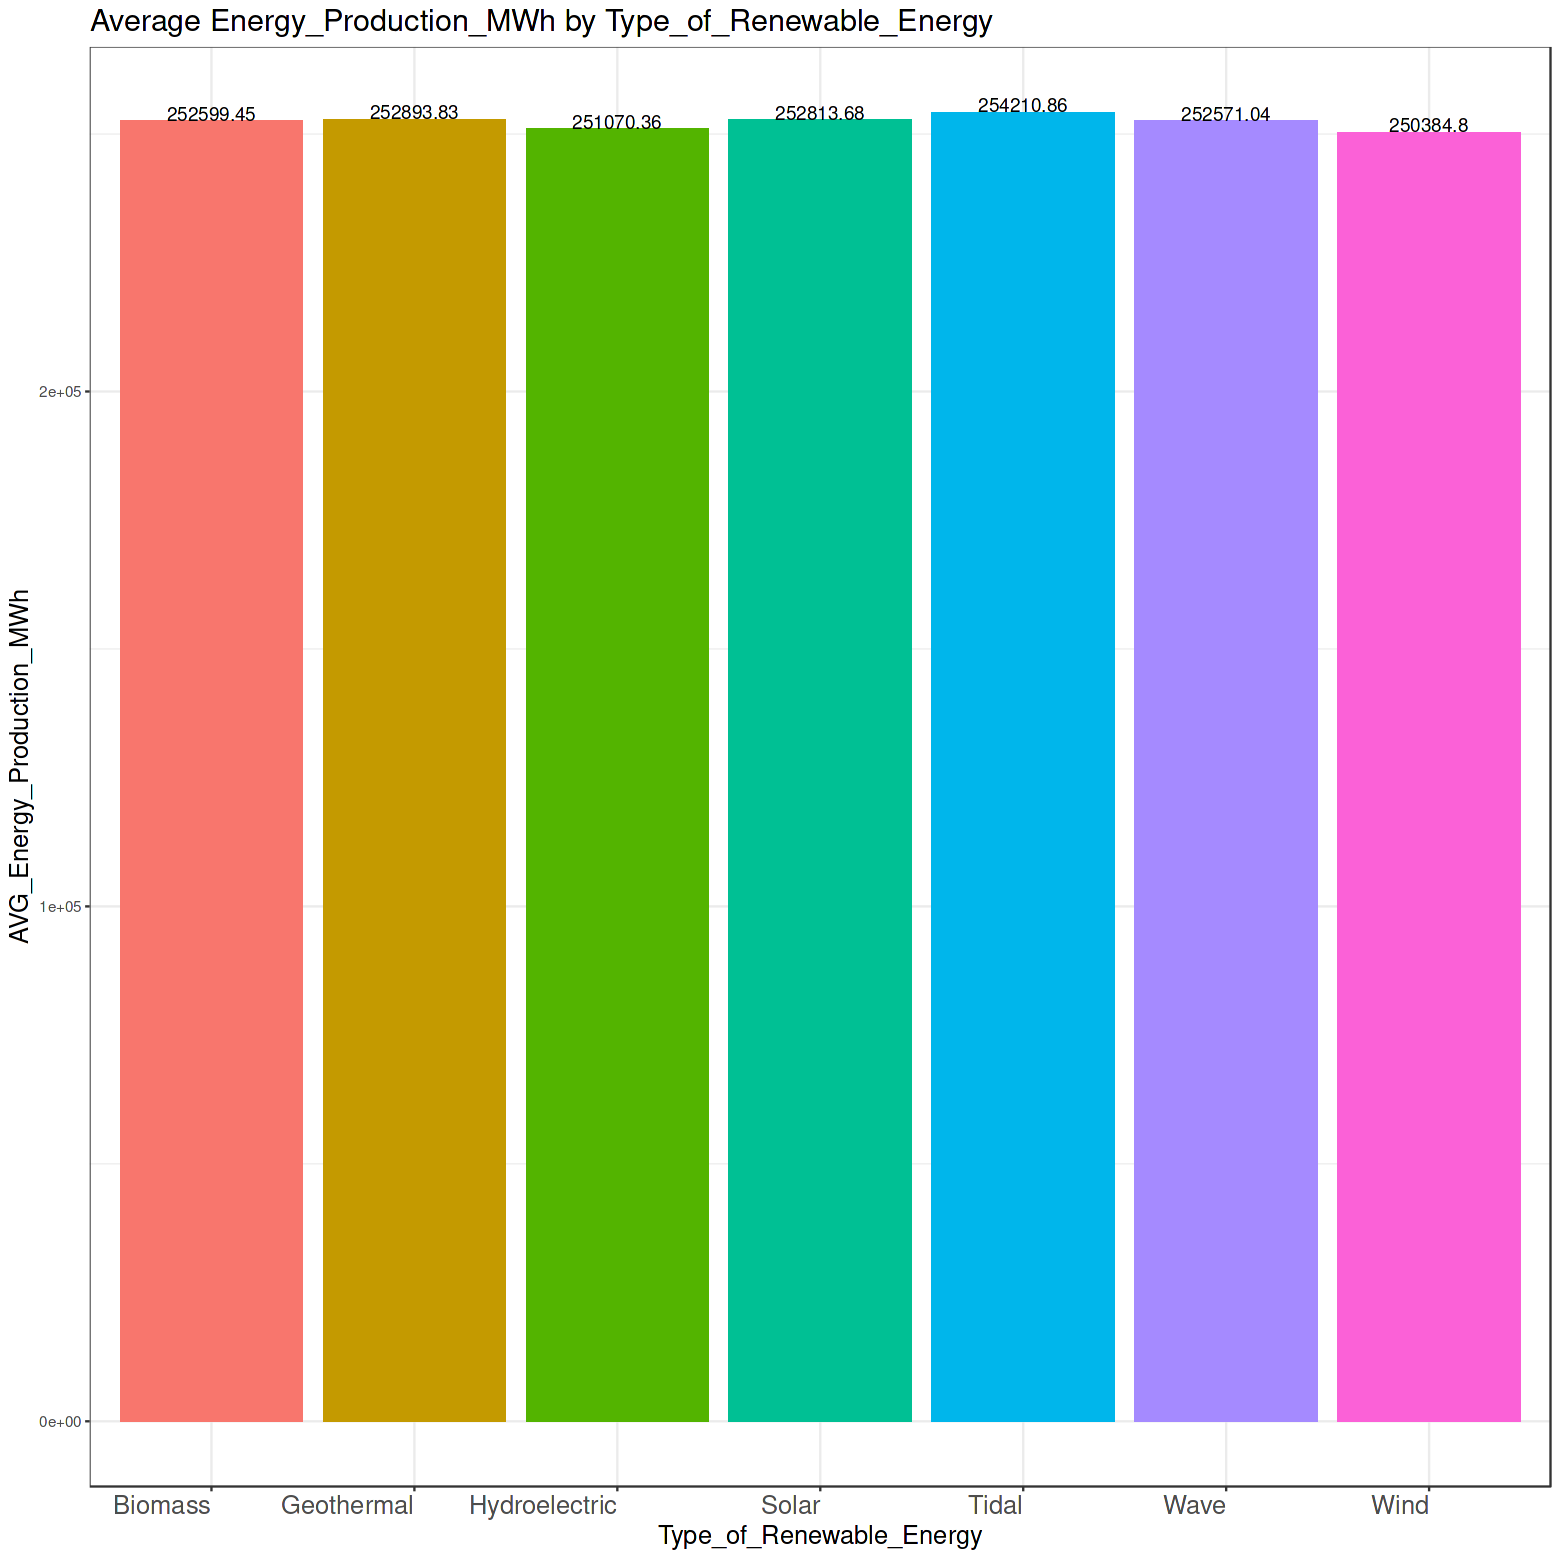

In [207]:
ggplot(RE_EP) + geom_col(aes(x= Type_of_Renewable_Energy, y= AVG_Energy_Production_MWh,  fill = Type_of_Renewable_Energy)) +
    geom_text(aes(x=Type_of_Renewable_Energy , y= AVG_Energy_Production_MWh, label= round(AVG_Energy_Production_MWh,2), vjust=0)) +
    ggtitle('Average Energy_Production_MWh by Type_of_Renewable_Energy')+
    theme_bw() +
    theme(
    legend.position = 'none',
    axis.title = element_text(size=15),
    axis.text.x = element_text(size = 15, hjust=1),
    title = element_text(size=15)
    )

**Correlation**

In [193]:
num_cols <- c('Installed_Capacity_MW','Energy_Production_MWh',
              'Energy_Consumption_MWh','Energy_Storage_Capacity_MWh','Storage_Efficiency_Percentage',
              'Initial_Investment_USD','Financial_Incentives_USD',
              'GHG_Emission_Reduction_tCO2e','Air_Pollution_Reduction_Index','Jobs_Created')

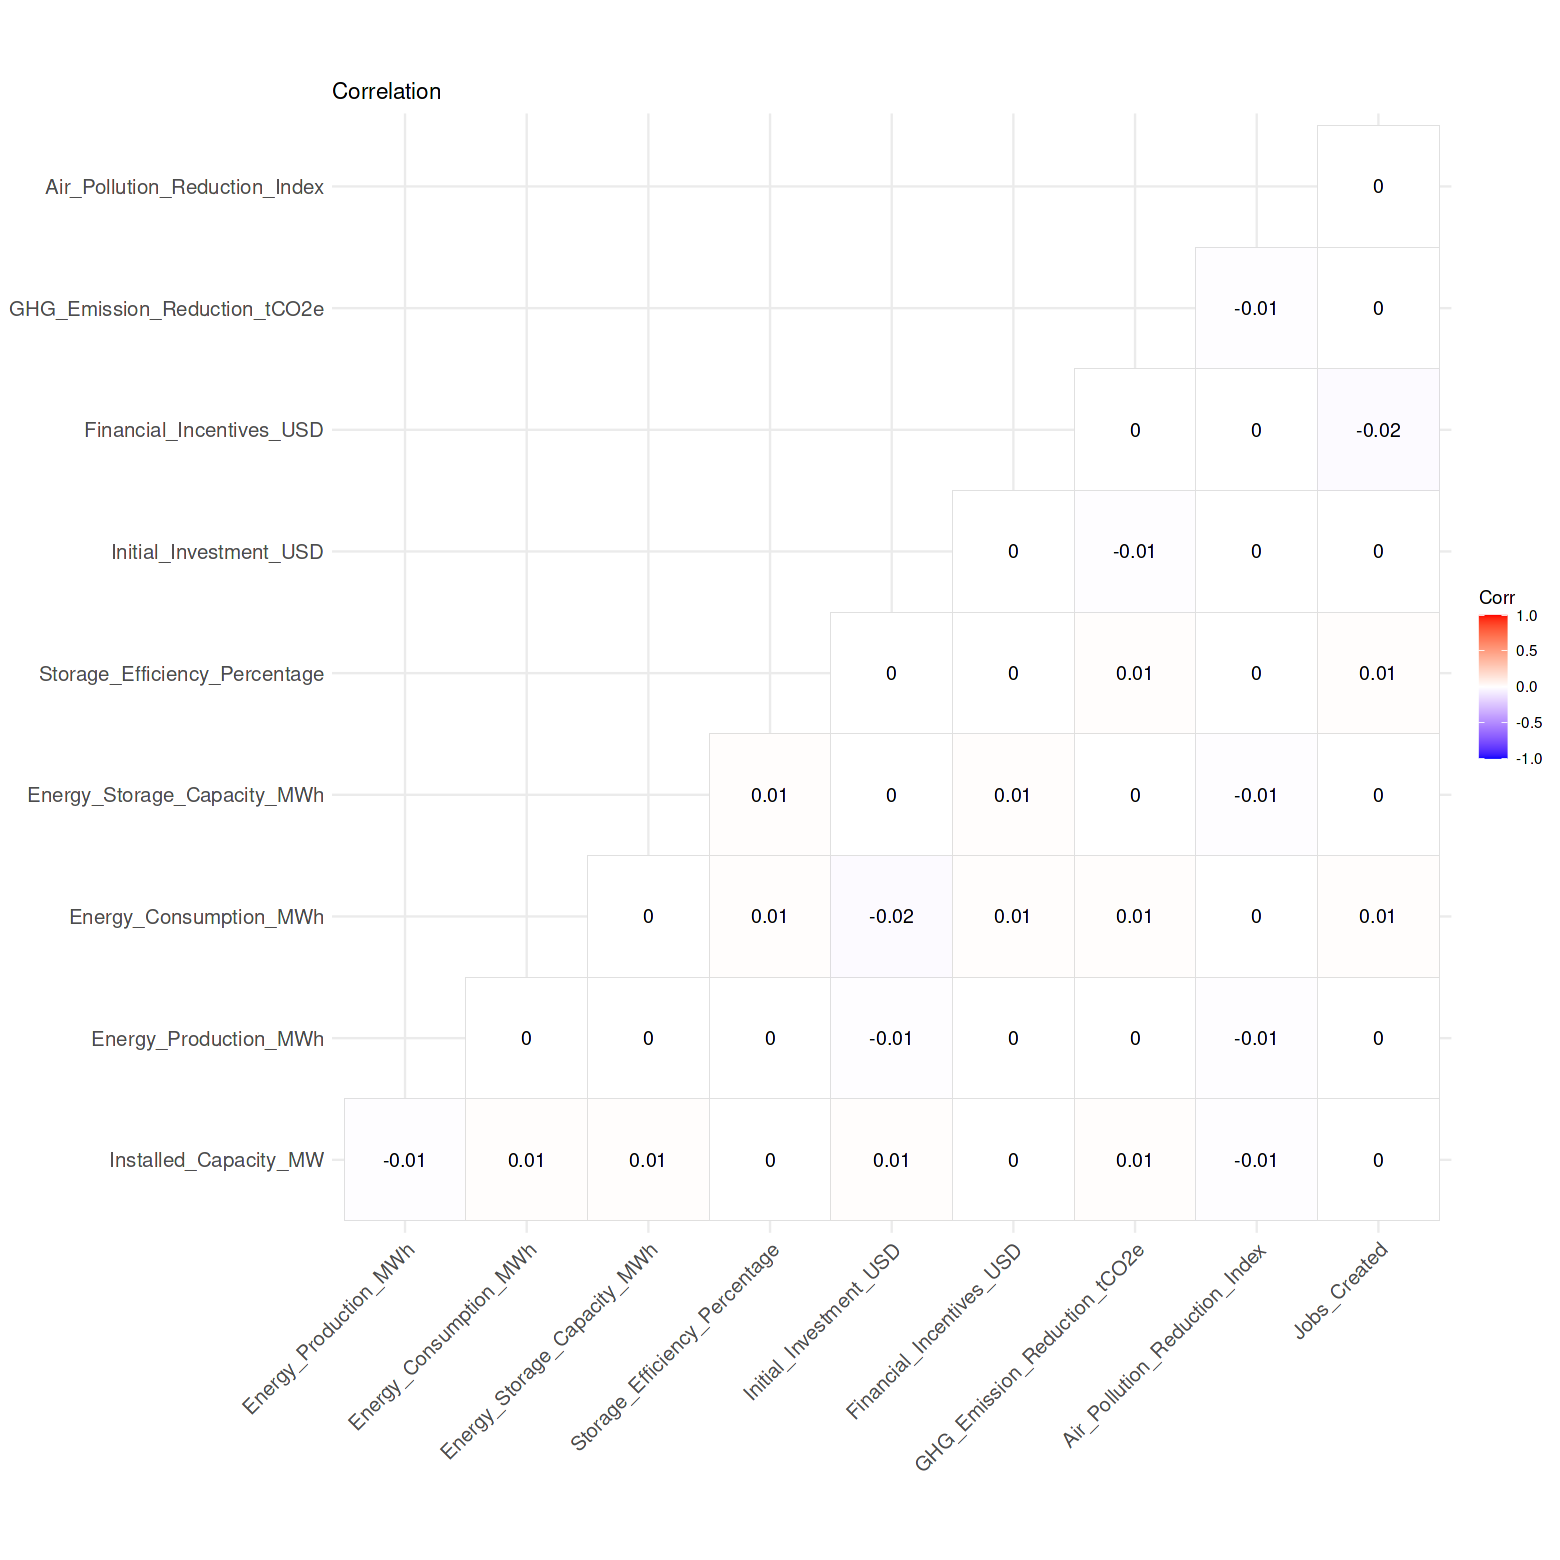

In [194]:
ggcorrplot(cor(data[,num_cols]) , type = "lower", lab=T, title = 'Correlation')

**Please leave your advice in the comments. Thank you**